<a href="https://colab.research.google.com/github/rabnawaz172/ET/blob/main/ET_Desert_Display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Prompt the user to upload a file
uploaded = files.upload()

# Check the uploaded files
for filename in uploaded.keys():
    print(f'Uploaded file: "{filename}", {len(uploaded[filename])} bytes')

Saving ET_BWP.csv to ET_BWP.csv
Uploaded file: "ET_BWP.csv", 750320 bytes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

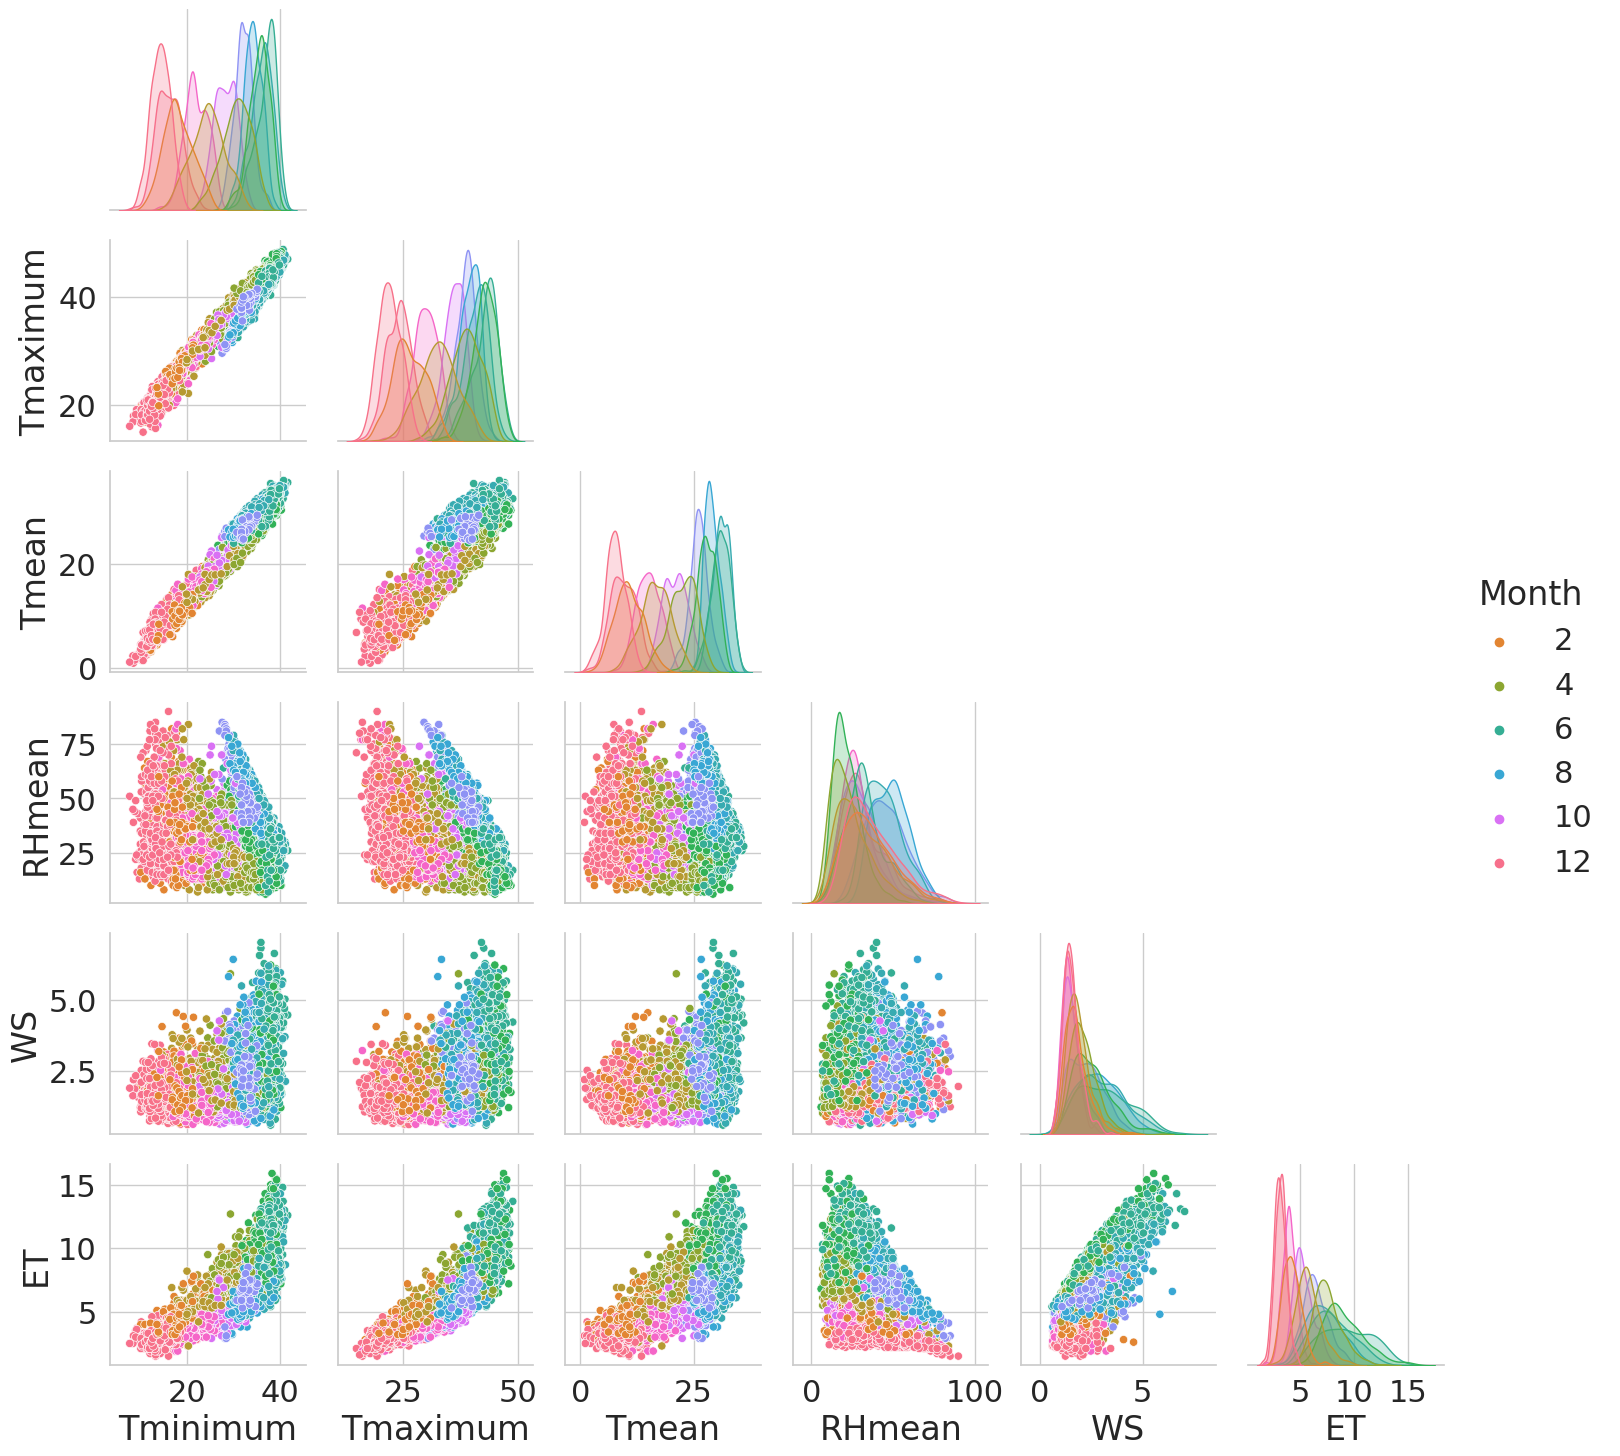

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
sns.set(font_scale=2, style="whitegrid")
# Load the CSV file into a DataFrame
df = pd.read_csv("ET_BWP.csv")

# Define the columns to remove
columns_to_remove = [
    'ET_M1', 'D_M1', 'ET_M2', 'D_M2',
    'ET_M3', 'D_M3', 'ET_M4', 'D_M4',
    'ET_M5', 'D_M5', 'id', 'Day', 'Year'
]

# Remove the specified columns
df = df.drop(columns=columns_to_remove)

# Create a pair plot using Seaborn with whitegrid

g = sns.pairplot(df, corner=True, hue="Month", palette="husl")

# Increase font size of labels for both x and y axes

# Save the plot temporarily
plot_path = "/content/pair_plot.png"
plt.savefig(plot_path, dpi=400)

# Download the saved plot
files.download(plot_path)

# Show the plot
plt.show()


In [ ]:
df

,Month,Tminimum,Tmaximum,Tmean,RHmean,WS,ET
0,1,12.4,20.3,6.3,58,2.03,2.8
1,1,12.1,19.4,5.9,60,1.29,2.3
2,1,12.8,20.2,8.4,56,1.60,2.6
3,1,11.8,19.1,6.1,60,1.41,2.3
4,1,13.0,19.8,7.5,54,0.98,2.2
...,...,...,...,...,...,...,...
6477,9,31.7,37.9,25.7,47,1.95,5.9
6478,9,31.7,38.0,26.1,43,2.54,6.7
6479,9,31.7,39.1,25.0,41,2.37,6.9
6480,9,32.0,39.5,24.6,39,2.21,6.8


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 9.0 MB/s eta 0:00:00


Epoch 1/50
130/130 [==============================] - 1s 2ms/step - loss: 27.4014 - val_loss: 11.3427
Epoch 2/50
130/130 [==============================] - 0s 2ms/step - loss: 4.6652 - val_loss: 2.6985
Epoch 3/50
130/130 [==============================] - 0s 1ms/step - loss: 2.2612 - val_loss: 1.9220
Epoch 4/50
130/130 [==============================] - 0s 1ms/step - loss: 1.5284 - val_loss: 1.2629
Epoch 5/50
130/130 [==============================] - 0s 1ms/step - loss: 0.9657 - val_loss: 0.7759
Epoch 6/50
130/130 [==============================] - 0s 2ms/step - loss: 0.6023 - val_loss: 0.4926
Epoch 7/50
130/130 [==============================] - 0s 2ms/step - loss: 0.3975 - val_loss: 0.3365
Epoch 8/50
130/130 [==============================] - 0s 2ms/step - loss: 0.2848 - val_loss: 0.2478
Epoch 9/50
130/130 [==============================] - 0s 1ms/step - loss: 0.2201 - val_loss: 0.1949
Epoch 10/50
130/130 [==============================] - 0s 1ms/step - loss: 0.1793 - val_loss: 0.15

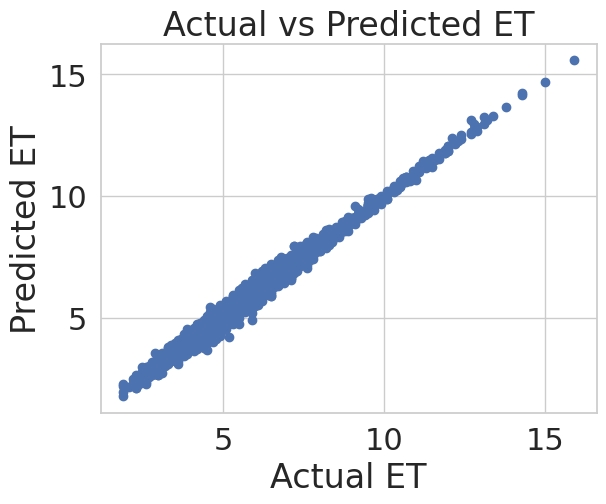

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset
# Assuming you have a CSV file named 'et_data.csv' with columns: Tminimum, Tmaximum, Tmean, RHmean, WS, ET
data = pd.read_csv('ET_BWP.csv')

# Selecting relevant features and target variable
features = ['Tminimum', 'Tmaximum', 'Tmean', 'RHmean', 'WS']
target = 'ET'

# Extracting features and target variable
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {mse}')

# Make predictions on the test set
predictions = model.predict(X_test)

# Visualize the predictions vs actual values
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual ET')
plt.ylabel('Predicted ET')
plt.title('Actual vs Predicted ET')
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import itertools  # Add this line for itertools

# Load your dataset
# Assuming you have a CSV file named 'et_data.csv' with columns: Tminimum, Tmaximum, Tmean, RHmean, WS, ET
data = pd.read_csv('ET_BWP.csv')

# Selecting all possible combinations of features
all_features = ['Tminimum', 'Tmaximum', 'Tmean', 'RHmean', 'WS']
target = 'ET'

# Iterate through all possible combinations of features
for i in range(1, len(all_features) + 1):
    feature_combinations = itertools.combinations(all_features, i)
    for features in feature_combinations:
        features = list(features)
        print(f"\nFeatures: {features}")

        # Extracting features and target variable
        X = data[features]
        y = data[target]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize the linear regression model
        model = LinearRegression()

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = model.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, predictions)
        print(f'Mean Squared Error: {mse}')




Features: ['Tminimum']
Mean Squared Error: 1.73385073227679

Features: ['Tmaximum']
Mean Squared Error: 1.4909865950990129

Features: ['Tmean']
Mean Squared Error: 2.1619664745601184

Features: ['RHmean']
Mean Squared Error: 5.81248686376103

Features: ['WS']
Mean Squared Error: 2.459121230538544

Features: ['Tminimum', 'Tmaximum']
Mean Squared Error: 1.4776165116386673

Features: ['Tminimum', 'Tmean']
Mean Squared Error: 1.5805104856923073

Features: ['Tminimum', 'RHmean']
Mean Squared Error: 1.5607686887678551

Features: ['Tminimum', 'WS']
Mean Squared Error: 0.7817628077515544

Features: ['Tmaximum', 'Tmean']
Mean Squared Error: 1.4818964506356536

Features: ['Tmaximum', 'RHmean']
Mean Squared Error: 1.4709995762549142

Features: ['Tmaximum', 'WS']
Mean Squared Error: 0.5069620562446718

Features: ['Tmean', 'RHmean']
Mean Squared Error: 1.7062938834401908

Features: ['Tmean', 'WS']
Mean Squared Error: 1.1874564047808416

Features: ['RHmean', 'WS']
Mean Squared Error: 1.684178894093

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset
# Assuming you have a CSV file named 'et_data.csv' with columns: Tminimum, Tmaximum, Tmean, RHmean, WS, ET
data = pd.read_csv('ET_BWP.csv')

# Selecting specific features and target variable
features = ['Tminimum', 'Tmean', 'RHmean', 'WS']
target = 'ET'

# Extracting features and target variable
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 0.24537834383971624


Epoch 1/50
130/130 [==============================] - 1s 2ms/step - loss: 32.3567 - mae: 5.2078 - mse: 32.3567 - mape: 84.7473 - val_loss: 19.3071 - val_mae: 3.9400 - val_mse: 19.3071 - val_mape: 58.8633
Epoch 2/50
130/130 [==============================] - 0s 2ms/step - loss: 8.5450 - mae: 2.4510 - mse: 8.5450 - mape: 39.3158 - val_loss: 3.1509 - val_mae: 1.4566 - val_mse: 3.1509 - val_mape: 25.9413
Epoch 3/50
130/130 [==============================] - 0s 2ms/step - loss: 2.2523 - mae: 1.2025 - mse: 2.2523 - mape: 22.3315 - val_loss: 1.8568 - val_mae: 1.1095 - val_mse: 1.8568 - val_mape: 20.6821
Epoch 4/50
130/130 [==============================] - 0s 2ms/step - loss: 1.5204 - mae: 0.9818 - mse: 1.5204 - mape: 18.6449 - val_loss: 1.3309 - val_mae: 0.9323 - val_mse: 1.3309 - val_mape: 17.7307
Epoch 5/50
130/130 [==============================] - 0s 2ms/step - loss: 1.0878 - mae: 0.8303 - mse: 1.0878 - mape: 16.0406 - val_loss: 0.9357 - val_mae: 0.7720 - val_mse: 0.9357 - val_mape: 14.5

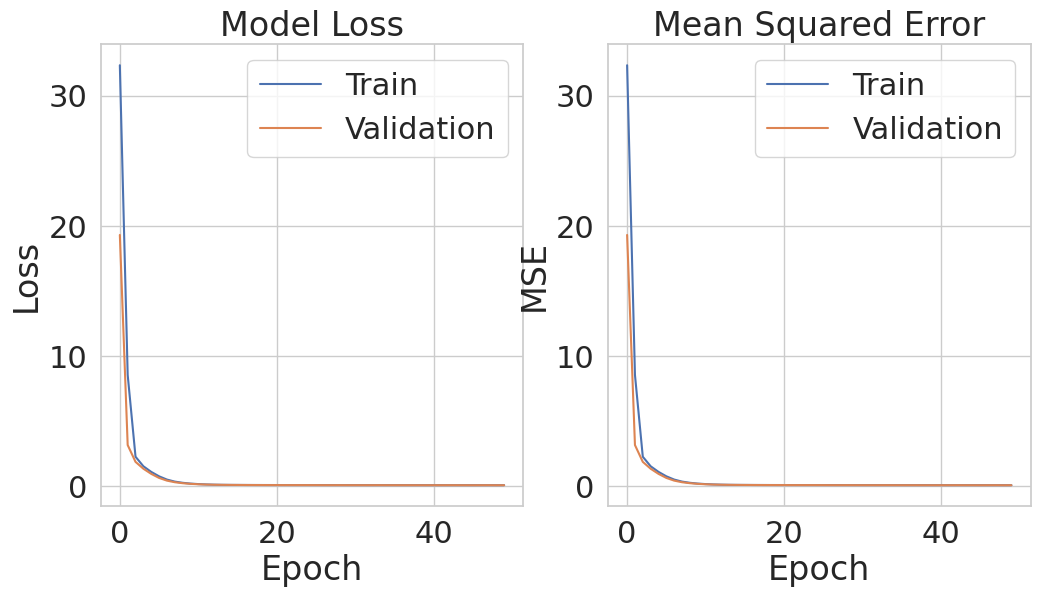

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset
data = pd.read_csv('ET_BWP.csv')

# Selecting specific features and target variable
features = ['Tminimum', 'Tmean', 'RHmean', 'WS']
target = 'ET'

# Convert 'ET' to numeric format
data['ET'] = pd.to_numeric(data['ET'], errors='coerce')

# Extracting features and target variable
X = data[features]
y = data[target]

# Drop rows with missing target values
data = data.dropna(subset=['ET'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse', 'mape'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
results = model.evaluate(X_test, y_test, verbose=0)
print("\nTest Set Metrics:")
print(f'Mean Squared Error: {results[1]}')
print(f'Mean Absolute Error: {results[2]}')
print(f'Mean Squared Percentage Error: {results[3]}')

# Visualize the training history
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Plot training & validation metric values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mse'])
    plt.plot(history.history['val_mse'])
    plt.title('Mean Squared Error')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

plot_history(history)



Epoch 1/50
130/130 [==============================] - 1s 3ms/step - loss: 28.4342 - mae: 4.8583 - mse: 28.4342 - mape: 79.2558 - val_loss: 14.9034 - val_mae: 3.4714 - val_mse: 14.9034 - val_mape: 53.6372
Epoch 2/50
130/130 [==============================] - 0s 2ms/step - loss: 6.4671 - mae: 2.0865 - mse: 6.4671 - mape: 34.8049 - val_loss: 2.6935 - val_mae: 1.3186 - val_mse: 2.6935 - val_mape: 23.2954
Epoch 3/50
130/130 [==============================] - 0s 2ms/step - loss: 2.0504 - mae: 1.1484 - mse: 2.0504 - mape: 21.4671 - val_loss: 1.6976 - val_mae: 1.0538 - val_mse: 1.6976 - val_mape: 19.5391
Epoch 4/50
130/130 [==============================] - 0s 2ms/step - loss: 1.4497 - mae: 0.9629 - mse: 1.4497 - mape: 18.3545 - val_loss: 1.2522 - val_mae: 0.8958 - val_mse: 1.2522 - val_mape: 16.8398
Epoch 5/50
130/130 [==============================] - 0s 2ms/step - loss: 1.0544 - mae: 0.8185 - mse: 1.0544 - mape: 15.7755 - val_loss: 0.9014 - val_mae: 0.7526 - val_mse: 0.9014 - val_mape: 14.2

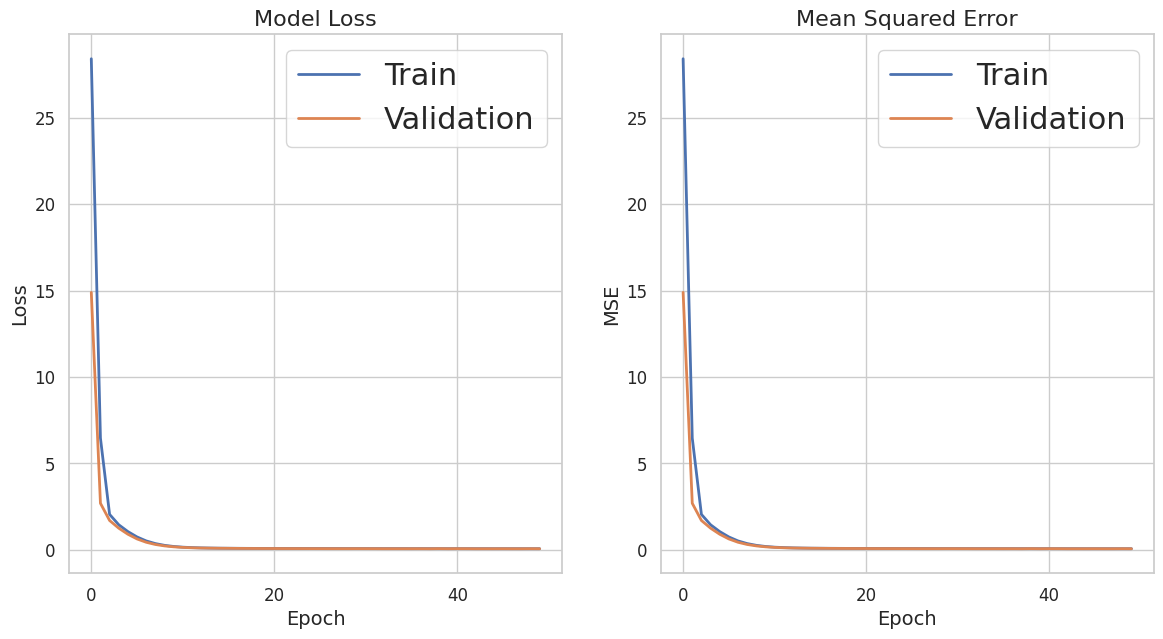

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('ET_BWP.csv')

# Selecting specific features and target variable
features = ['Tminimum', 'Tmean', 'RHmean', 'WS']
target = 'ET'

# Convert 'ET' to numeric format
data['ET'] = pd.to_numeric(data['ET'], errors='coerce')

# Extracting features and target variable
X = data[features]
y = data[target]

# Drop rows with missing target values
data = data.dropna(subset=['ET'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse', 'mape'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
results = model.evaluate(X_test, y_test, verbose=0)
print("\nTest Set Metrics:")
print(f'Mean Squared Error: {results[1]}')
print(f'Mean Absolute Error: {results[2]}')
print(f'Mean Squared Percentage Error: {results[3]}')

# Visualize the training history with increased line width, tick size, and label size
def plot_history(history):
    plt.figure(figsize=(14, 7))

    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], linewidth=2)
    plt.plot(history.history['val_loss'], linewidth=2)
    plt.title('Model Loss', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Plot training & validation metric values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mse'], linewidth=2)
    plt.plot(history.history['val_mse'], linewidth=2)
    plt.title('Mean Squared Error', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('MSE', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

plot_history(history)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset
data = pd.read_csv('ET_BWP.csv')

# Selecting specific features and target variable
features = ['Tminimum', 'Tmean', 'RHmean', 'WS']
target = 'ET'

# Convert 'ET' to numeric format
data['ET'] = pd.to_numeric(data['ET'], errors='coerce')

# Extracting features and target variable
X = data[features]
y = data[target]

# Drop rows with missing target values
data = data.dropna(subset=['ET'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
def build_simple_nn(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=input_shape),
        layers.Dense(1)  # Output layer with one neuron for regression
    ])
    return model

def build_deeper_nn(input_shape):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)  # Output layer with one neuron for regression
    ])
    return model

def build_rnn(input_shape):
    model = keras.Sequential([
        layers.LSTM(64, activation='relu', input_shape=(input_shape[0], 1)),
        layers.Dense(1)  # Output layer with one neuron for regression
    ])
    return model

# Train and evaluate models
def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=50, batch_size=32):
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse', 'mape'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    results = model.evaluate(X_test, y_test, verbose=0)
    return results, history

# Evaluate simple neural network
simple_nn = build_simple_nn((X_train.shape[1],))
results_simple_nn, history_simple_nn = train_and_evaluate(simple_nn, X_train, y_train, X_test, y_test)

# Evaluate deeper neural network
deeper_nn = build_deeper_nn((X_train.shape[1],))
results_deeper_nn, history_deeper_nn = train_and_evaluate(deeper_nn, X_train, y_train, X_test, y_test)

# Reshape data for RNN
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Evaluate recurrent neural network (RNN)
rnn = build_rnn((X_train_rnn.shape[1], 1))
results_rnn, history_rnn = train_and_evaluate(rnn, X_train_rnn, y_train, X_test_rnn, y_test)

# Display results
print("\nSimple Neural Network Metrics:")
print(f'Mean Squared Error: {results_simple_nn[1]}')
print(f'Mean Absolute Error: {results_simple_nn[2]}')
print(f'Mean Squared Percentage Error: {results_simple_nn[3]}')

print("\nDeeper Neural Network Metrics:")
print(f'Mean Squared Error: {results_deeper_nn[1]}')
print(f'Mean Absolute Error: {results_deeper_nn[2]}')
print(f'Mean Squared Percentage Error: {results_deeper_nn[3]}')

print("\nRecurrent Neural Network (RNN) Metrics:")
print(f'Mean Squared Error: {results_rnn[1]}')
print(f'Mean Absolute Error: {results_rnn[2]}')
print(f'Mean Squared Percentage Error: {results_rnn[3]}')



Simple Neural Network Metrics:
Mean Squared Error: 0.2007739394903183
Mean Absolute Error: 0.06682447344064713
Mean Squared Percentage Error: 3.9549944400787354

Deeper Neural Network Metrics:
Mean Squared Error: 0.21753369271755219
Mean Absolute Error: 0.07580067962408066
Mean Squared Percentage Error: 4.111024379730225

Recurrent Neural Network (RNN) Metrics:
Mean Squared Error: 0.22056780755519867
Mean Absolute Error: 0.07715616375207901
Mean Squared Percentage Error: 4.311230182647705


SIMPLEE ANN

Epoch 1/50
130/130 [==============================] - 1s 3ms/step - loss: 27.9183 - mae: 4.8096 - mse: 27.9183 - mape: 79.0704 - r2_metric: -3.8176 - val_loss: 13.4114 - val_mae: 3.2850 - val_mse: 13.4114 - val_mape: 51.0327 - val_r2_metric: -1.1512
Epoch 2/50
130/130 [==============================] - 0s 2ms/step - loss: 5.4735 - mae: 1.8739 - mse: 5.4735 - mape: 31.5203 - r2_metric: 0.0408 - val_loss: 2.5027 - val_mae: 1.2500 - val_mse: 2.5027 - val_mape: 22.4926 - val_r2_metric: 0.5769
Epoch 3/50
130/130 [==============================] - 0s 2ms/step - loss: 2.1362 - mae: 1.1549 - mse: 2.1362 - mape: 21.7318 - r2_metric: 0.6233 - val_loss: 1.8926 - val_mae: 1.1040 - val_mse: 1.8926 - val_mape: 20.7023 - val_r2_metric: 0.6801
Epoch 4/50
130/130 [==============================] - 0s 2ms/step - loss: 1.6365 - mae: 1.0172 - mse: 1.6365 - mape: 19.5183 - r2_metric: 0.7150 - val_loss: 1.4289 - val_mae: 0.9584 - val_mse: 1.4289 - val_mape: 18.2515 - val_r2_metric: 0.7583
Epoch 5/50
130/130

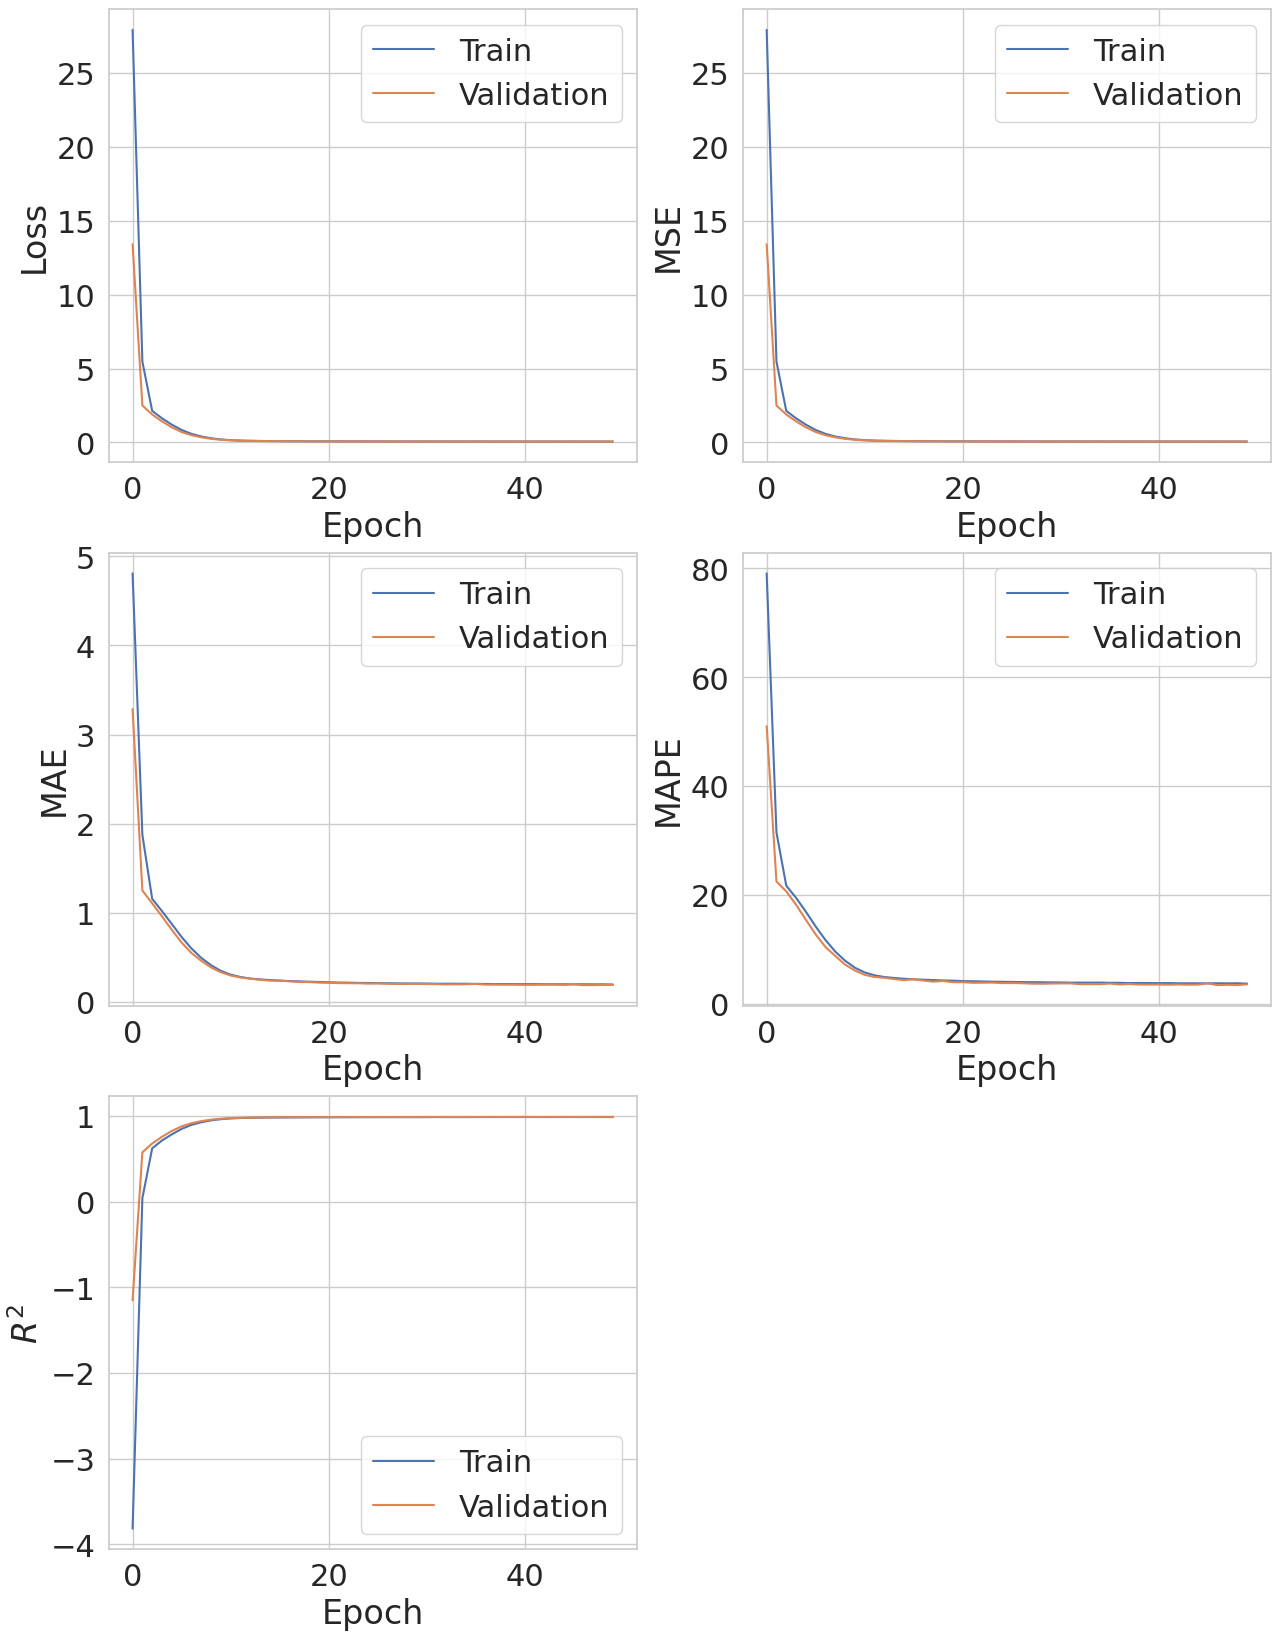

Simple Neural Network - Training Metrics:
  MSE: 0.06173563748598099, MAE: 0.19378693401813507, MAPE: 3.8059072494506836, R^2: -458.84625244140625
Simple Neural Network - Validation Metrics:
  MSE: 0.06570913642644882, MAE: 0.20011049509048462, MAPE: 3.94150447845459, $R^2$: 0.9881153702735901


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K

# Load your dataset
data = pd.read_csv('ET_BWP.csv')

# Selecting specific features and target variable
features = ['Tminimum', 'Tmean', 'RHmean', 'WS']
target = 'ET'

# Convert 'ET' to numeric format
data['ET'] = pd.to_numeric(data['ET'], errors='coerce')

# Extracting features and target variable
X = data[features]
y = data[target]

# Drop rows with missing target values
data = data.dropna(subset=['ET'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Record R^2 manually
def r2_metric(y_true, y_pred):
    y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
    y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

# Define models
def build_simple_nn(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=input_shape),
        layers.Dense(1)  # Output layer with one neuron for regression
    ])
    return model

# ...

# Train and evaluate models
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name, epochs=50, batch_size=32):
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse', 'mape', r2_metric])

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

    # Calculate metrics during training
    metrics_train = model.evaluate(X_train, y_train, verbose=0)
    mse_train, mae_train, _, mape_train, r2_train = metrics_train

    # Calculate metrics during validation
    metrics_val = model.evaluate(X_test, y_test, verbose=0)
    mse_val, mae_val, _, mape_val, r2_val = metrics_val

    # Plot training history
    plt.figure(figsize=(15, 20))
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    # Plot training & validation loss values
    plt.subplot(3, 2, 1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    #plt.title(f'{model_name} - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training & validation MSE values
    plt.subplot(3, 2, 2)
    plt.plot(history.history['mse'], label='Train')
    plt.plot(history.history['val_mse'], label='Validation')
    #plt.title(f'{model_name} - Mean Squared Error')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()

    # Plot training & validation MAE values
    plt.subplot(3, 2, 3)
    plt.plot(history.history['mae'], label='Train')
    plt.plot(history.history['val_mae'], label='Validation')
    #plt.title(f'{model_name} - Mean Absolute Error')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()

    # Plot training & validation MAPE values
    plt.subplot(3, 2, 4)
    plt.plot(history.history['mape'], label='Train')
    plt.plot(history.history['val_mape'], label='Validation')
    #plt.title(f'{model_name} - Mean Absolute Percentage Error')
    plt.xlabel('Epoch')
    plt.ylabel('MAPE')
    plt.legend()

    # Plot training & validation R^2 values
    plt.subplot(3, 2, 5)
    plt.plot(history.history['r2_metric'], label='Train')
    plt.plot(history.history['val_r2_metric'], label='Validation')
    #plt.title(f'{model_name} - $R^2$')
    plt.xlabel('Epoch')
    plt.ylabel('$R^2$')
    plt.legend()

    # Show the plots
    plt.show()

    # Report metrics
    print(f"{model_name} - Training Metrics:")
    print(f"  MSE: {mse_train}, MAE: {mae_train}, MAPE: {mape_train}, R^2: {r2_train}")
    print(f"{model_name} - Validation Metrics:")
    print(f"  MSE: {mse_val}, MAE: {mae_val}, MAPE: {mape_val}, $R^2$: {r2_val}")

# Evaluate simple neural network
simple_nn = build_simple_nn((X_train.shape[1],))
train_and_evaluate(simple_nn, X_train, y_train, X_test, y_test, model_name='Simple Neural Network')





Epoch 1/50
130/130 [==============================] - 1s 3ms/step - loss: 27.6428 - mae: 4.6772 - mse: 27.6428 - mape: 74.0057 - r2_metric: -3.7546 - val_loss: 13.3976 - val_mae: 3.1873 - val_mse: 13.3976 - val_mape: 47.0583 - val_r2_metric: -1.1538
Epoch 2/50
130/130 [==============================] - 0s 2ms/step - loss: 5.3983 - mae: 1.8556 - mse: 5.3983 - mape: 30.7091 - r2_metric: 0.0718 - val_loss: 2.3256 - val_mae: 1.2249 - val_mse: 2.3256 - val_mape: 22.5704 - val_r2_metric: 0.6058
Epoch 3/50
130/130 [==============================] - 0s 2ms/step - loss: 1.9320 - mae: 1.1011 - mse: 1.9320 - mape: 20.8848 - r2_metric: 0.6483 - val_loss: 1.6623 - val_mae: 1.0354 - val_mse: 1.6623 - val_mape: 19.5838 - val_r2_metric: 0.7177
Epoch 4/50
130/130 [==============================] - 0s 2ms/step - loss: 1.4104 - mae: 0.9430 - mse: 1.4104 - mape: 18.1709 - r2_metric: 0.7507 - val_loss: 1.2016 - val_mae: 0.8751 - val_mse: 1.2016 - val_mape: 16.7377 - val_r2_metric: 0.7958
Epoch 5/50
130/130

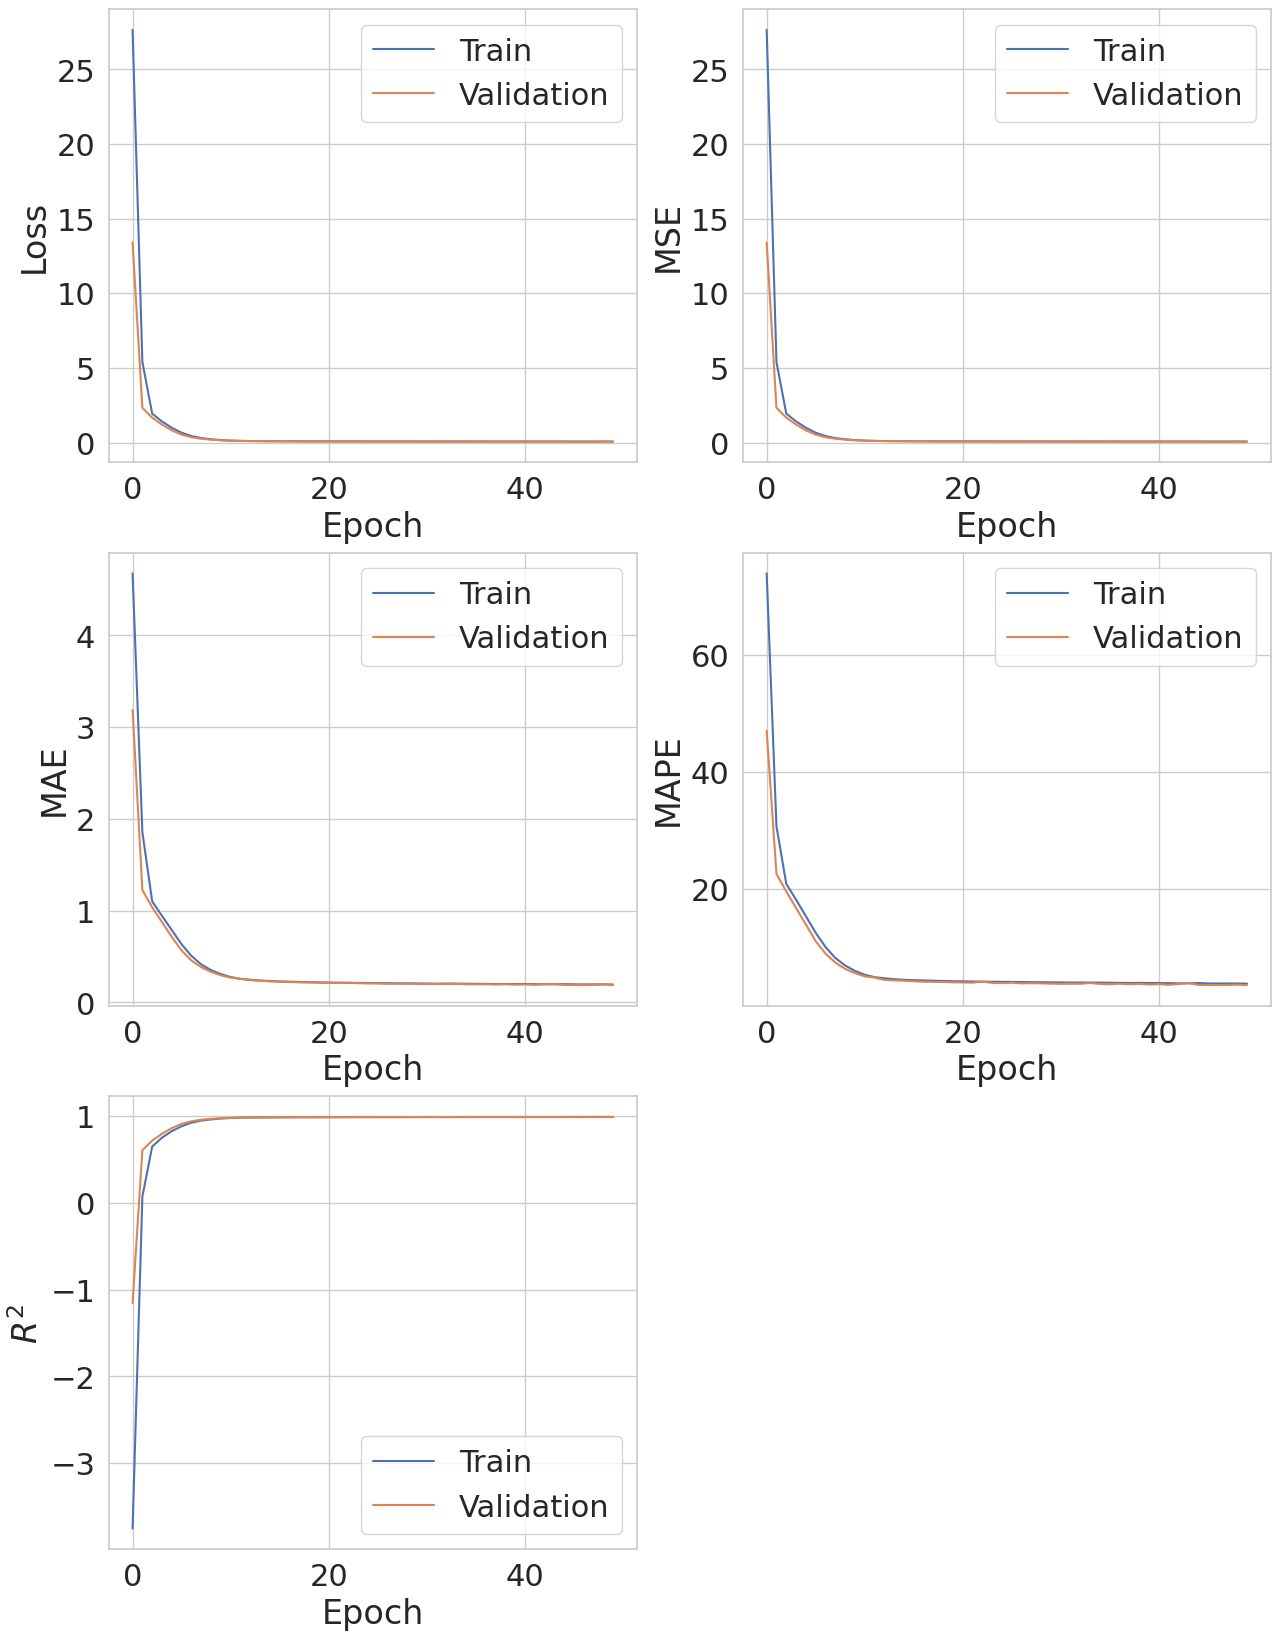

Simple Neural Network - Training Metrics:
  MSE: 0.06255664676427841, MAE: 0.1921849399805069, MAPE: 3.7273550033569336, R^2: -1184.4854736328125
Simple Neural Network - Validation Metrics:
  MSE: 0.0670243576169014, MAE: 0.20032960176467896, MAPE: 3.917320489883423, $R^2$: 0.9879286885261536
Epoch 1/50
130/130 [==============================] - 1s 3ms/step - loss: 10.1890 - mae: 2.2305 - mse: 10.1890 - mape: 38.0078 - r2_metric: -0.6638 - val_loss: 1.4754 - val_mae: 0.9400 - val_mse: 1.4754 - val_mape: 17.6027 - val_r2_metric: 0.7502
Epoch 2/50
130/130 [==============================] - 0s 2ms/step - loss: 0.7406 - mae: 0.6406 - mse: 0.7406 - mape: 12.3240 - r2_metric: 0.8611 - val_loss: 0.1804 - val_mae: 0.3256 - val_mse: 0.1804 - val_mape: 6.3062 - val_r2_metric: 0.9697
Epoch 3/50
130/130 [==============================] - 0s 2ms/step - loss: 0.1016 - mae: 0.2444 - mse: 0.1016 - mape: 4.7688 - r2_metric: 0.9817 - val_loss: 0.0784 - val_mae: 0.2151 - val_mse: 0.0784 - val_mape: 4.058

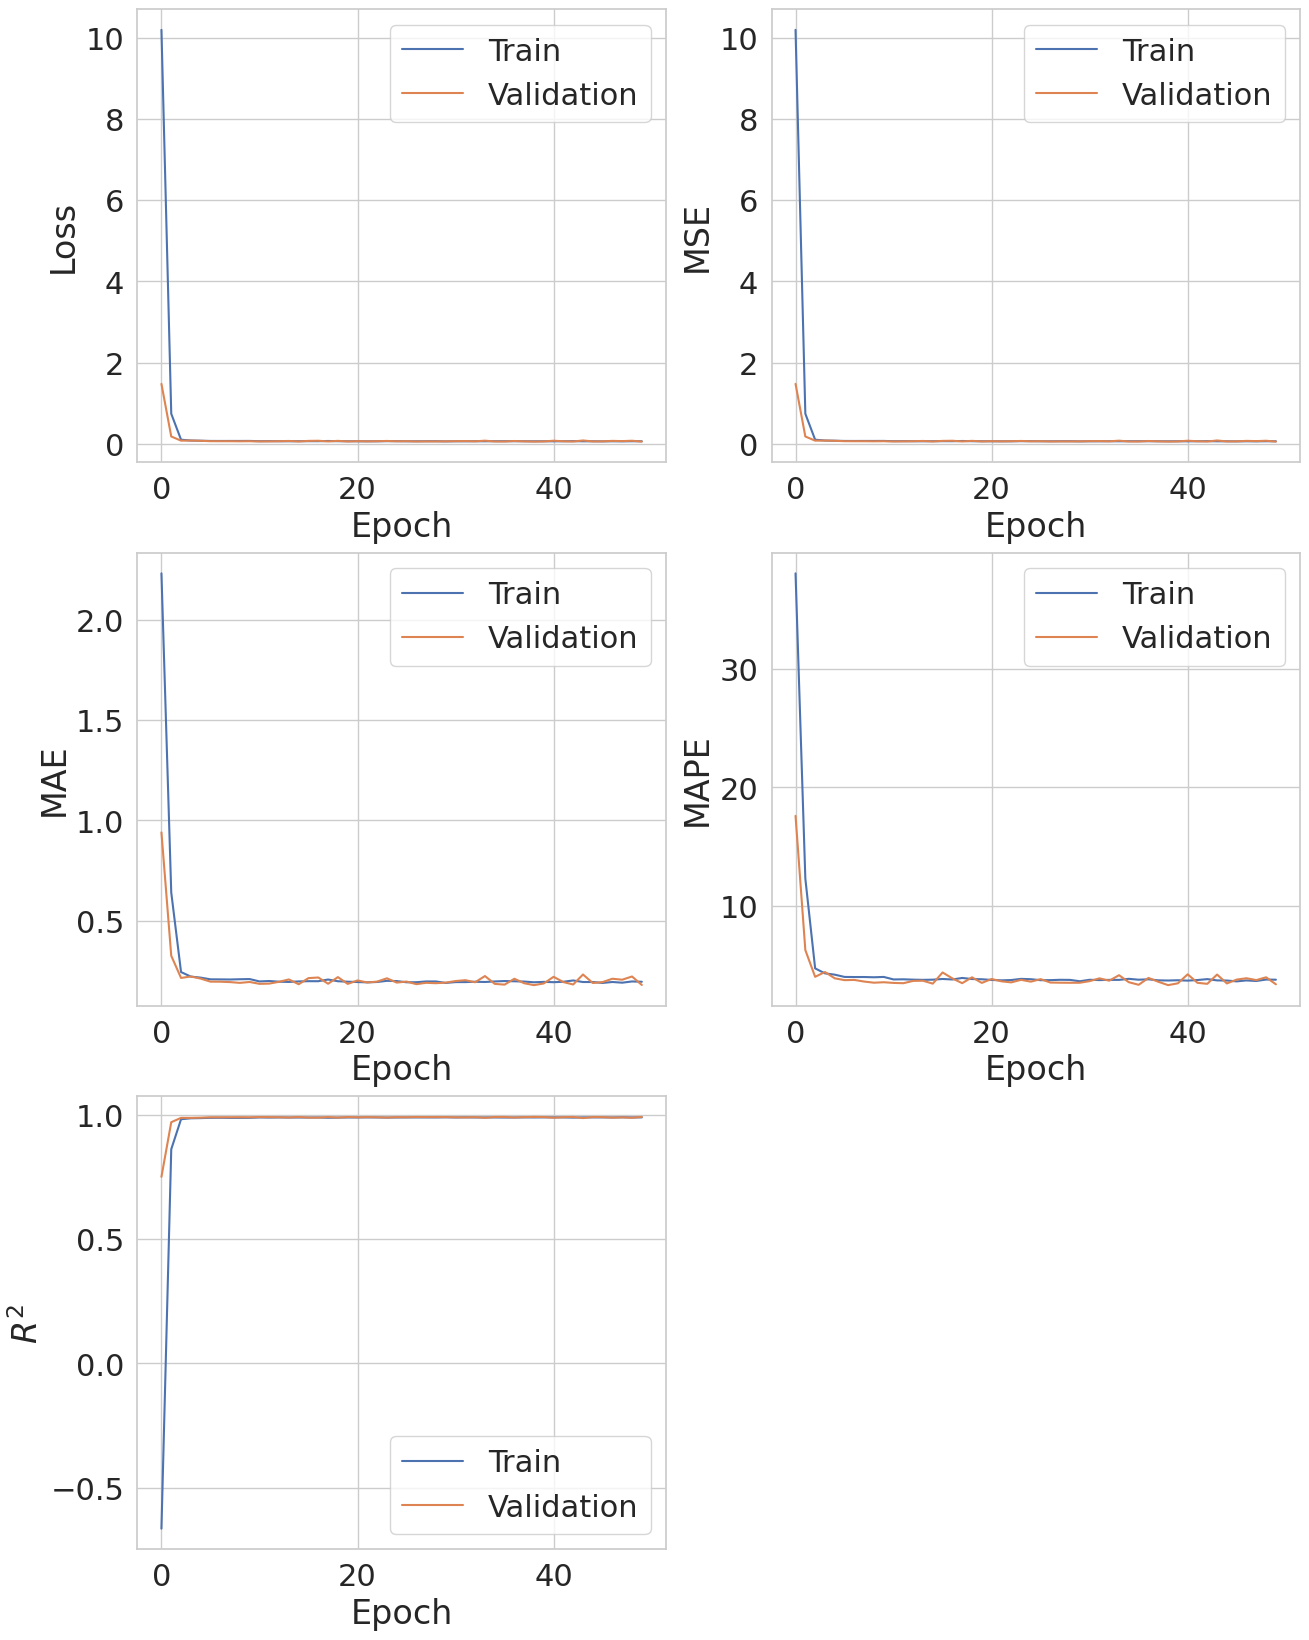

Deep Neural Network - Training Metrics:
  MSE: 0.05469752848148346, MAE: 0.1801643967628479, MAPE: 3.515374183654785, R^2: -5.3744916915893555
Deep Neural Network - Validation Metrics:
  MSE: 0.06097446382045746, MAE: 0.19135671854019165, MAPE: 3.7257745265960693, $R^2$: 0.989088773727417
Epoch 1/50


ValueError: ignored

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K

# Load your dataset
data = pd.read_csv('ET_BWP.csv')

# Selecting specific features and target variable
features = ['Tminimum', 'Tmean', 'RHmean', 'WS']
target = 'ET'

# Convert 'ET' to numeric format
data['ET'] = pd.to_numeric(data['ET'], errors='coerce')

# Extracting features and target variable
X = data[features]
y = data[target]

# Drop rows with missing target values
data = data.dropna(subset=['ET'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Record R^2 manually
def r2_metric(y_true, y_pred):
    y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
    y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

# Define models
def build_simple_nn(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=input_shape),
        layers.Dense(1)  # Output layer with one neuron for regression
    ])
    return model

def build_deep_nn(input_shape):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Output layer with one neuron for regression
    ])
    return model

def build_simple_rnn(input_shape):
    model = keras.Sequential([
        layers.SimpleRNN(64, activation='relu', input_shape=input_shape),
        layers.Dense(1)  # Output layer with one neuron for regression
    ])
    return model

# Train and evaluate models
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name, epochs=50, batch_size=32):
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse', 'mape', r2_metric])

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

    # Calculate metrics during training
    metrics_train = model.evaluate(X_train, y_train, verbose=0)
    mse_train, mae_train, _, mape_train, r2_train = metrics_train

    # Calculate metrics during validation
    metrics_val = model.evaluate(X_test, y_test, verbose=0)
    mse_val, mae_val, _, mape_val, r2_val = metrics_val

    # Plot training history
    plt.figure(figsize=(15, 20))
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    # Plot training & validation loss values
    plt.subplot(3, 2, 1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training & validation MSE values
    plt.subplot(3, 2, 2)
    plt.plot(history.history['mse'], label='Train')
    plt.plot(history.history['val_mse'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()

    # Plot training & validation MAE values
    plt.subplot(3, 2, 3)
    plt.plot(history.history['mae'], label='Train')
    plt.plot(history.history['val_mae'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()

    # Plot training & validation MAPE values
    plt.subplot(3, 2, 4)
    plt.plot(history.history['mape'], label='Train')
    plt.plot(history.history['val_mape'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('MAPE')
    plt.legend()

    # Plot training & validation R^2 values
    plt.subplot(3, 2, 5)
    plt.plot(history.history['r2_metric'], label='Train')
    plt.plot(history.history['val_r2_metric'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('$R^2$')
    plt.legend()

    # Show the plots
    plt.show()

    # Report metrics
    print(f"{model_name} - Training Metrics:")
    print(f"  MSE: {mse_train}, MAE: {mae_train}, MAPE: {mape_train}, R^2: {r2_train}")
    print(f"{model_name} - Validation Metrics:")
    print(f"  MSE: {mse_val}, MAE: {mae_val}, MAPE: {mape_val}, $R^2$: {r2_val}")

# Evaluate models
simple_nn = build_simple_nn((X_train.shape[1],))
train_and_evaluate(simple_nn, X_train, y_train, X_test, y_test, model_name='Simple Neural Network')

deep_nn = build_deep_nn((X_train.shape[1],))
train_and_evaluate(deep_nn, X_train, y_train, X_test, y_test, model_name='Deep Neural Network')

simple_rnn = build_simple_rnn((X_train.shape[1], 1))  # RNN input_shape should be (timesteps, features)
train_and_evaluate(simple_rnn, X_train.reshape(-1, 1, X_train.shape[1]), y_train, X_test.reshape(-1, 1, X_test.shape[1]), y_test, model_name='Simple RNN')


Epoch 1/50
130/130 [==============================] - 1s 3ms/step - loss: 31.4144 - mae: 5.0730 - mse: 31.4144 - mape: 81.9048 - r2_metric: -4.3568 - val_loss: 15.5384 - val_mae: 3.5764 - val_mse: 15.5384 - val_mape: 54.8848 - val_r2_metric: -1.5072
Epoch 2/50
130/130 [==============================] - 0s 2ms/step - loss: 6.5719 - mae: 2.1257 - mse: 6.5719 - mape: 35.3915 - r2_metric: -0.1685 - val_loss: 2.8419 - val_mae: 1.3654 - val_mse: 2.8419 - val_mape: 24.3792 - val_r2_metric: 0.5195
Epoch 3/50
130/130 [==============================] - 0s 2ms/step - loss: 2.2649 - mae: 1.2107 - mse: 2.2649 - mape: 22.6967 - r2_metric: 0.5908 - val_loss: 1.9581 - val_mae: 1.1403 - val_mse: 1.9581 - val_mape: 21.3077 - val_r2_metric: 0.6692
Epoch 4/50
130/130 [==============================] - 0s 2ms/step - loss: 1.6902 - mae: 1.0415 - mse: 1.6902 - mape: 20.0004 - r2_metric: 0.7001 - val_loss: 1.5049 - val_mae: 0.9895 - val_mse: 1.5049 - val_mape: 18.7848 - val_r2_metric: 0.7454
Epoch 5/50
130/13

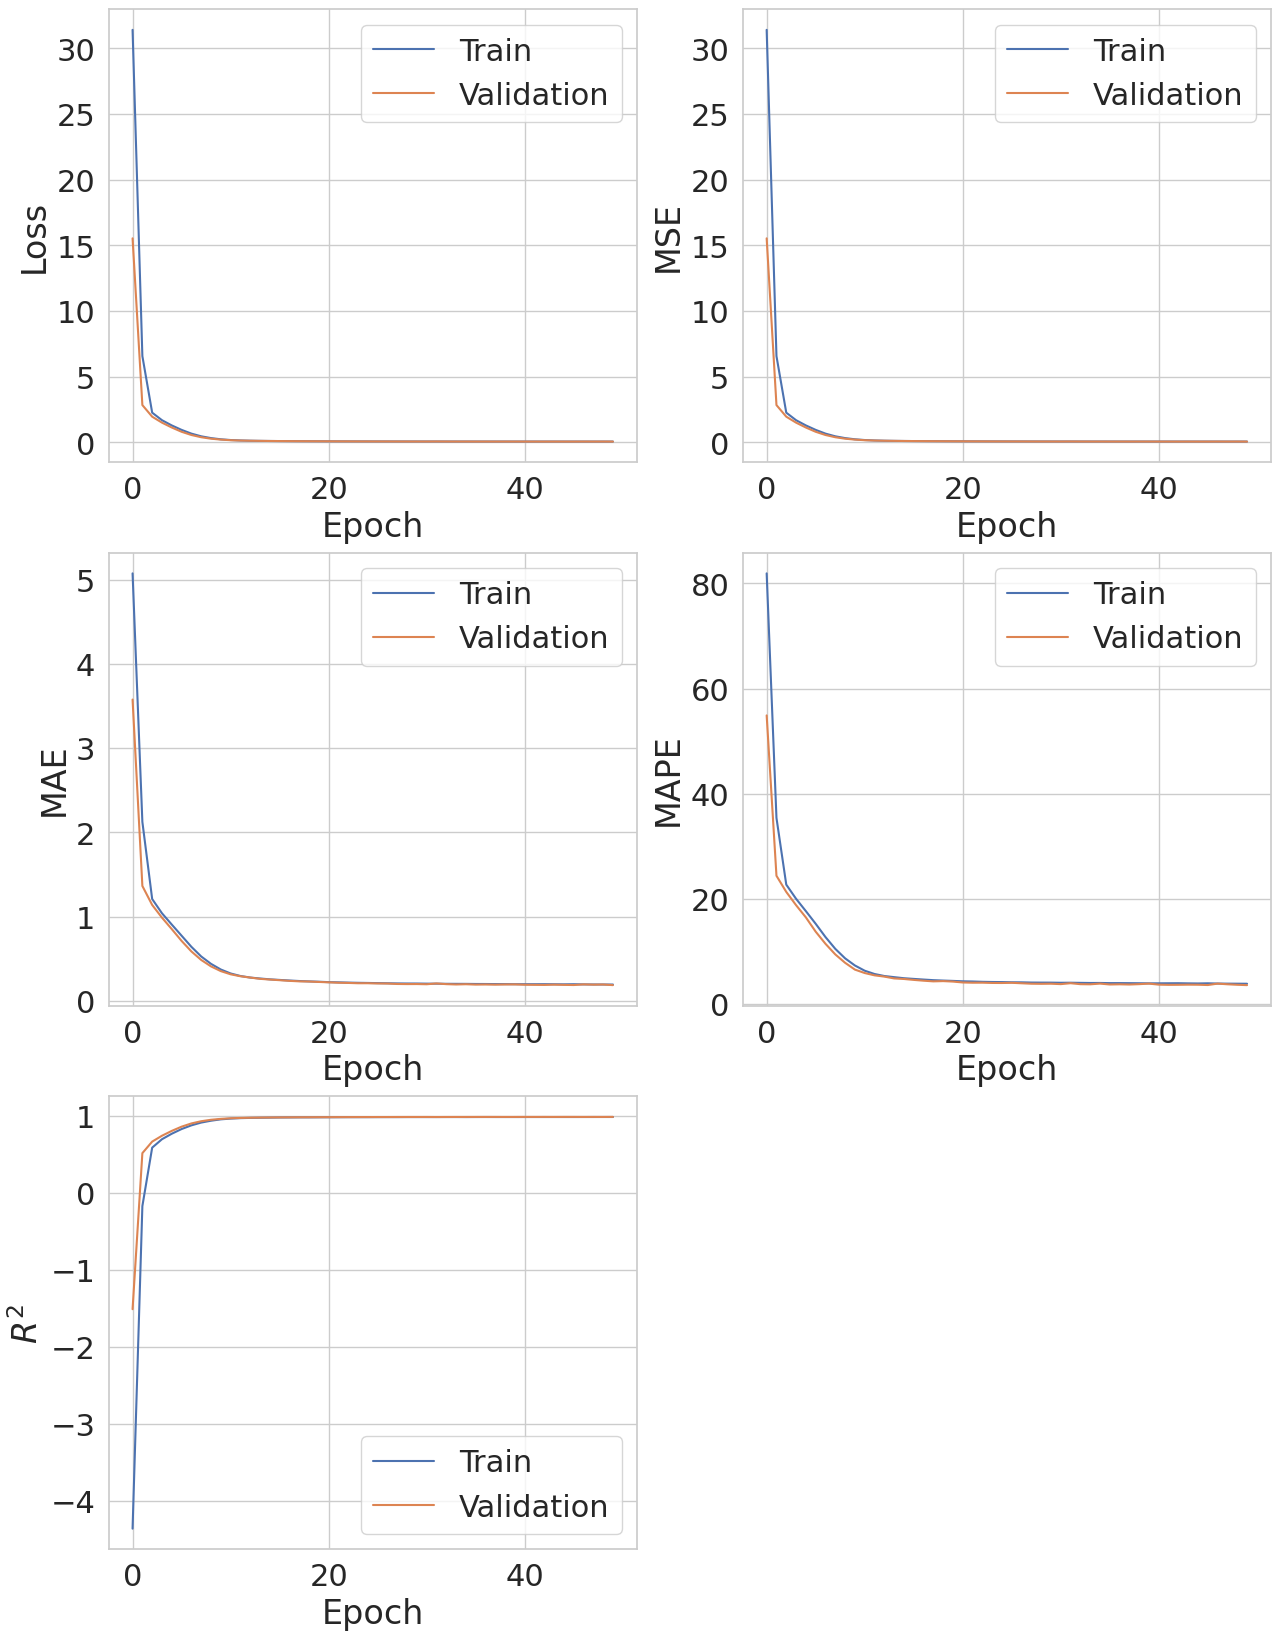

Simple Neural Network - Training Metrics:
  MSE: 0.062131017446517944, MAE: 0.1939467042684555, MAPE: 3.7615342140197754, R^2: -827.5304565429688
Simple Neural Network - Validation Metrics:
  MSE: 0.06686682254076004, MAE: 0.203048437833786, MAPE: 3.9532837867736816, $R^2$: 0.9878893494606018
Epoch 1/50
130/130 [==============================] - 1s 3ms/step - loss: 7.1765 - mae: 1.9161 - mse: 7.1765 - mape: 33.5527 - r2_metric: -0.2850 - val_loss: 1.5140 - val_mae: 0.9540 - val_mse: 1.5140 - val_mape: 18.1724 - val_r2_metric: 0.7430
Epoch 2/50
130/130 [==============================] - 0s 2ms/step - loss: 0.6471 - mae: 0.5882 - mse: 0.6471 - mape: 11.0592 - r2_metric: 0.8855 - val_loss: 0.1554 - val_mae: 0.3052 - val_mse: 0.1554 - val_mape: 5.6563 - val_r2_metric: 0.9741
Epoch 3/50
130/130 [==============================] - 0s 2ms/step - loss: 0.1103 - mae: 0.2559 - mse: 0.1103 - mape: 4.9596 - r2_metric: 0.9809 - val_loss: 0.0913 - val_mae: 0.2302 - val_mse: 0.0913 - val_mape: 4.3920 

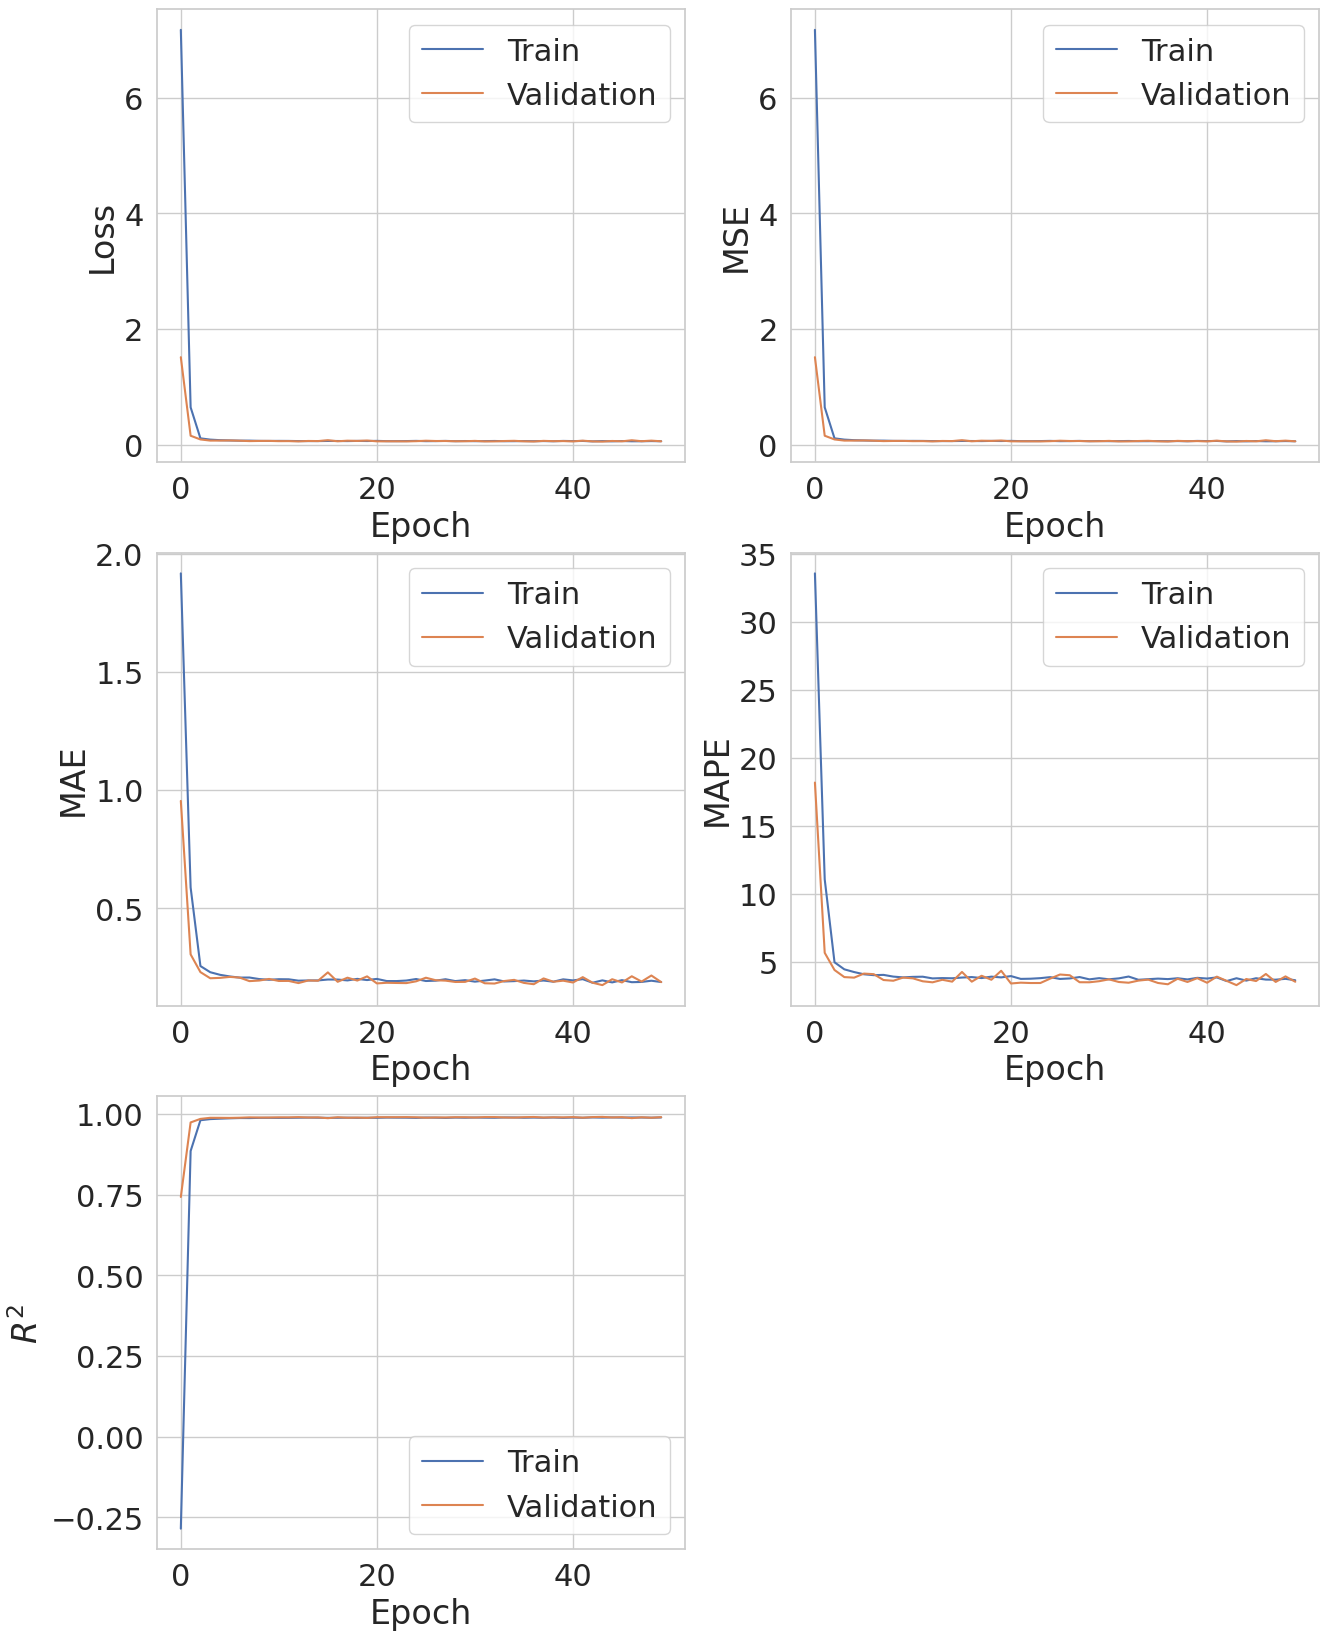

Deep Neural Network - Training Metrics:
  MSE: 0.05825762823224068, MAE: 0.18735003471374512, MAPE: 3.6390256881713867, R^2: -421.7423400878906
Deep Neural Network - Validation Metrics:
  MSE: 0.06504212319850922, MAE: 0.1959173083305359, MAPE: 3.811002731323242, $R^2$: 0.9882862567901611


IndexError: ignored

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K

# Load your dataset
data = pd.read_csv('ET_BWP.csv')

# Selecting specific features and target variable
features = ['Tminimum', 'Tmean', 'RHmean', 'WS']
target = 'ET'

# Convert 'ET' to numeric format
data['ET'] = pd.to_numeric(data['ET'], errors='coerce')

# Extracting features and target variable
X = data[features]
y = data[target]

# Drop rows with missing target values
data = data.dropna(subset=['ET'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Record R^2 manually
def r2_metric(y_true, y_pred):
    y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
    y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

# Define models
def build_simple_nn(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=input_shape),
        layers.Dense(1)  # Output layer with one neuron for regression
    ])
    return model

def build_deep_nn(input_shape):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Output layer with one neuron for regression
    ])
    return model

def build_simple_rnn(input_shape):
    model = keras.Sequential([
        layers.SimpleRNN(64, activation='relu', input_shape=(input_shape[1], input_shape[2])),
        layers.Dense(1)  # Output layer with one neuron for regression
    ])
    return model

# Train and evaluate models
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name, epochs=50, batch_size=32):
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse', 'mape', r2_metric])

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

    # Calculate metrics during training
    metrics_train = model.evaluate(X_train, y_train, verbose=0)
    mse_train, mae_train, _, mape_train, r2_train = metrics_train

    # Calculate metrics during validation
    metrics_val = model.evaluate(X_test, y_test, verbose=0)
    mse_val, mae_val, _, mape_val, r2_val = metrics_val

    # Plot training history
    plt.figure(figsize=(15, 20))
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    # Plot training & validation loss values
    plt.subplot(3, 2, 1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training & validation MSE values
    plt.subplot(3, 2, 2)
    plt.plot(history.history['mse'], label='Train')
    plt.plot(history.history['val_mse'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()

    # Plot training & validation MAE values
    plt.subplot(3, 2, 3)
    plt.plot(history.history['mae'], label='Train')
    plt.plot(history.history['val_mae'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()

    # Plot training & validation MAPE values
    plt.subplot(3, 2, 4)
    plt.plot(history.history['mape'], label='Train')
    plt.plot(history.history['val_mape'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('MAPE')
    plt.legend()

    # Plot training & validation R^2 values
    plt.subplot(3, 2, 5)
    plt.plot(history.history['r2_metric'], label='Train')
    plt.plot(history.history['val_r2_metric'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('$R^2$')
    plt.legend()

    # Show the plots
    plt.show()

    # Report metrics
    print(f"{model_name} - Training Metrics:")
    print(f"  MSE: {mse_train}, MAE: {mae_train}, MAPE: {mape_train}, R^2: {r2_train}")
    print(f"{model_name} - Validation Metrics:")
    print(f"  MSE: {mse_val}, MAE: {mae_val}, MAPE: {mape_val}, $R^2$: {r2_val}")

# Evaluate models
simple_nn = build_simple_nn((X_train.shape[1],))
train_and_evaluate(simple_nn, X_train, y_train, X_test, y_test, model_name='Simple Neural Network')

deep_nn = build_deep_nn((X_train.shape[1],))
train_and_evaluate(deep_nn, X_train, y_train, X_test, y_test, model_name='Deep Neural Network')

simple_rnn = build_simple_rnn(X_train.shape)
train_and_evaluate(simple_rnn, X_train.reshape(-1, 1, X_train.shape[1]), y_train, X_test.reshape(-1, 1, X_test.shape[1]), y_test, model_name='Simple RNN')



Epoch 1/50
130/130 [==============================] - 4s 10ms/step - loss: 15.7379 - mae: 3.0139 - mse: 15.7379 - mape: 51.3980 - r2_metric: -1.7419 - val_loss: 2.9648 - val_mae: 1.3849 - val_mse: 2.9648 - val_mape: 25.6127 - val_r2_metric: 0.5223
Epoch 2/50
130/130 [==============================] - 1s 8ms/step - loss: 2.5172 - mae: 1.2299 - mse: 2.5172 - mape: 22.4450 - r2_metric: 0.5720 - val_loss: 2.3597 - val_mae: 1.2065 - val_mse: 2.3597 - val_mape: 20.9018 - val_r2_metric: 0.6270
Epoch 3/50
130/130 [==============================] - 1s 7ms/step - loss: 2.0797 - mae: 1.1020 - mse: 2.0797 - mape: 19.5482 - r2_metric: 0.6518 - val_loss: 2.4686 - val_mae: 1.1784 - val_mse: 2.4686 - val_mape: 18.4020 - val_r2_metric: 0.6182
Epoch 4/50
130/130 [==============================] - 1s 7ms/step - loss: 1.8881 - mae: 1.0427 - mse: 1.8881 - mape: 18.1793 - r2_metric: 0.6879 - val_loss: 2.0059 - val_mae: 1.0830 - val_mse: 2.0059 - val_mape: 17.5863 - val_r2_metric: 0.6875
Epoch 5/50
130/130 [

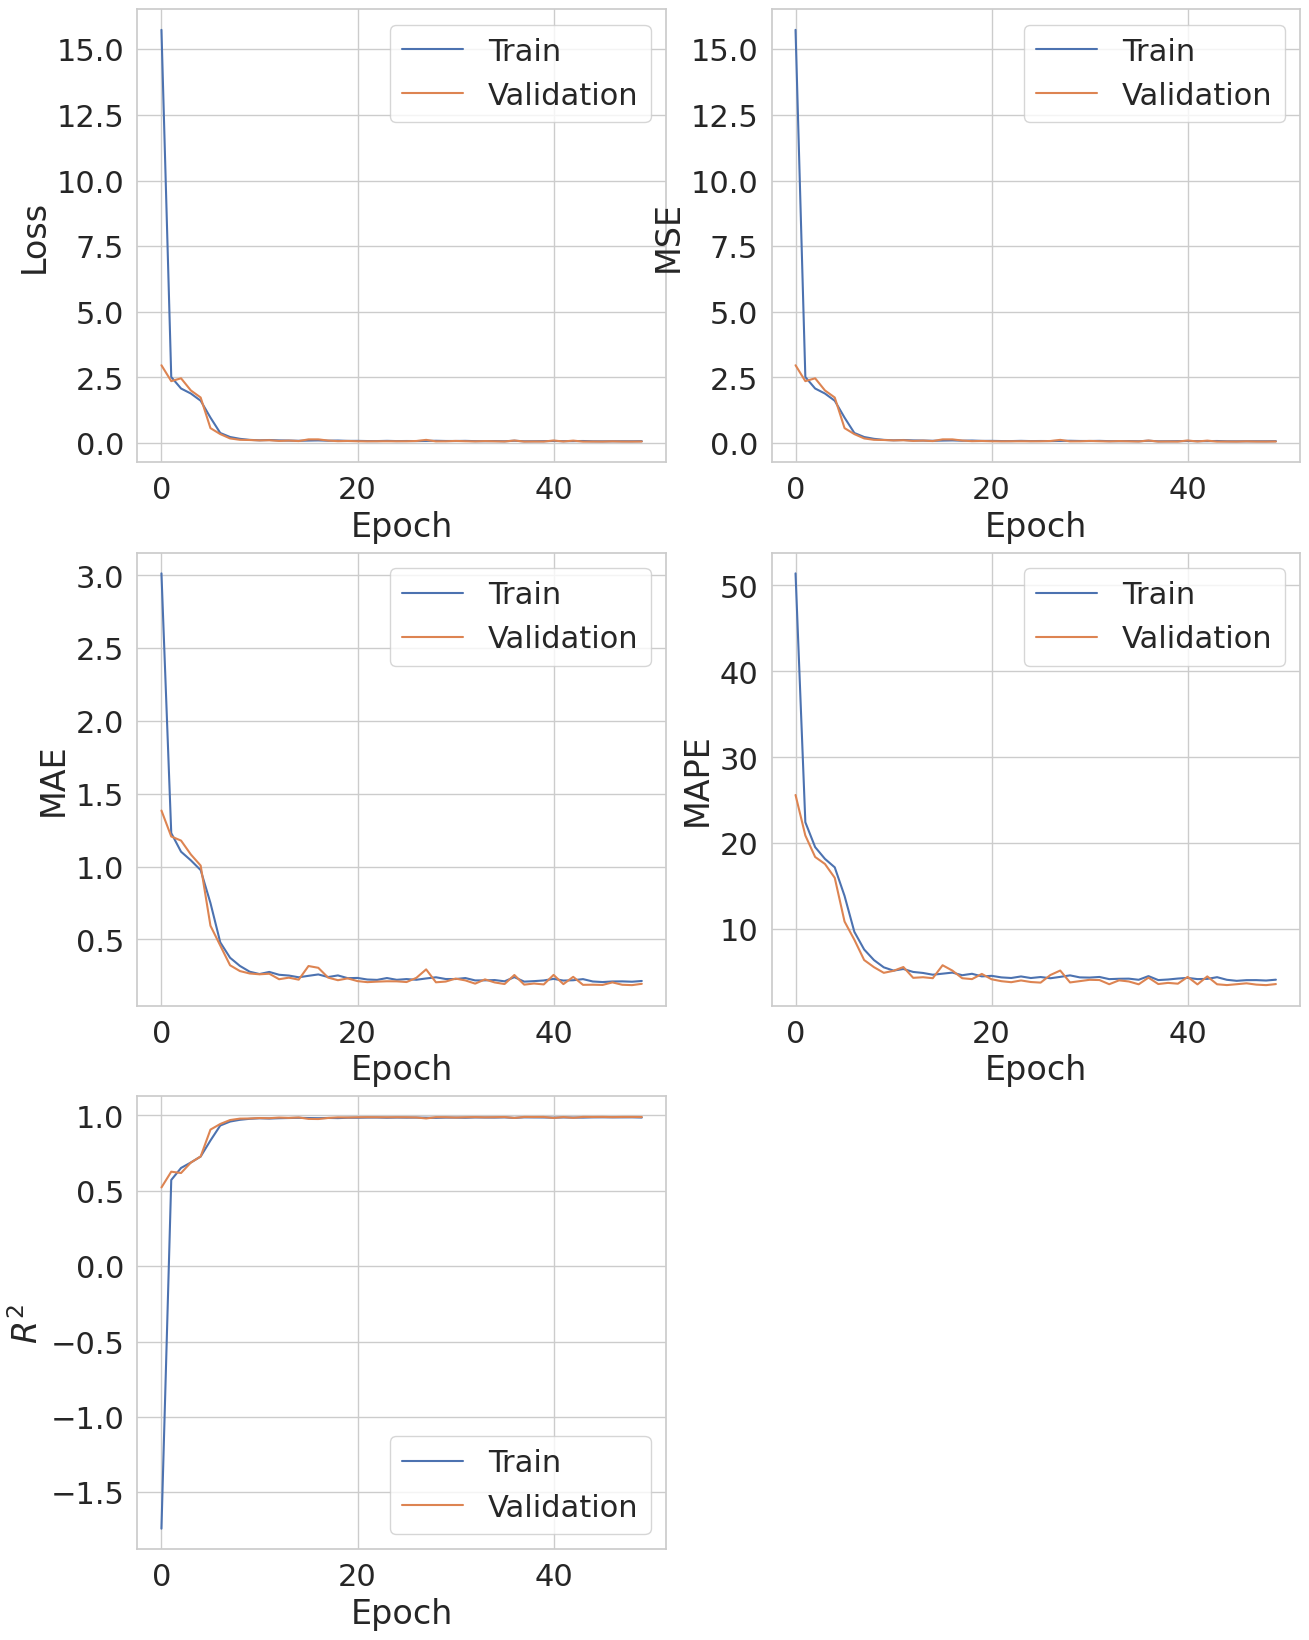

Deep Recurrent Neural Network - Training Metrics:
  MSE: 0.06391741335391998, MAE: 0.19932600855827332, MAPE: 3.820680856704712, R^2: -611.7640380859375
Deep Recurrent Neural Network - Validation Metrics:
  MSE: 0.06687764078378677, MAE: 0.20440421998500824, MAPE: 3.896711826324463, $R^2$: 0.987895131111145


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K

# Load your dataset
data = pd.read_csv('ET_BWP.csv')

# Selecting specific features and target variable
features = ['Tminimum', 'Tmean', 'RHmean', 'WS']
target = 'ET'

# Convert 'ET' to numeric format
data['ET'] = pd.to_numeric(data['ET'], errors='coerce')

# Extracting features and target variable
X = data[features]
y = data[target]

# Drop rows with missing target values
data = data.dropna(subset=['ET'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Record R^2 manually
def r2_metric(y_true, y_pred):
    y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
    y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

# Define deep RNN model
def build_deep_rnn(input_shape):
    model = keras.Sequential([
        layers.LSTM(64, activation='relu', return_sequences=True, input_shape=input_shape),
        layers.LSTM(64, activation='relu', return_sequences=True),
        layers.LSTM(64, activation='relu'),
        layers.Dense(1)  # Output layer with one neuron for regression
    ])
    return model

# Train and evaluate deep RNN
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name, epochs=50, batch_size=32):
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse', 'mape', r2_metric])

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

    # Calculate metrics during training
    metrics_train = model.evaluate(X_train, y_train, verbose=0)
    mse_train, mae_train, _, mape_train, r2_train = metrics_train

    # Calculate metrics during validation
    metrics_val = model.evaluate(X_test, y_test, verbose=0)
    mse_val, mae_val, _, mape_val, r2_val = metrics_val

    # Plot training history
    plt.figure(figsize=(15, 20))
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    # Plot training & validation loss values
    plt.subplot(3, 2, 1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training & validation MSE values
    plt.subplot(3, 2, 2)
    plt.plot(history.history['mse'], label='Train')
    plt.plot(history.history['val_mse'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()

    # Plot training & validation MAE values
    plt.subplot(3, 2, 3)
    plt.plot(history.history['mae'], label='Train')
    plt.plot(history.history['val_mae'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()

    # Plot training & validation MAPE values
    plt.subplot(3, 2, 4)
    plt.plot(history.history['mape'], label='Train')
    plt.plot(history.history['val_mape'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('MAPE')
    plt.legend()

    # Plot training & validation R^2 values
    plt.subplot(3, 2, 5)
    plt.plot(history.history['r2_metric'], label='Train')
    plt.plot(history.history['val_r2_metric'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('$R^2$')
    plt.legend()

    # Show the plots
    plt.show()

    # Report metrics
    print(f"{model_name} - Training Metrics:")
    print(f"  MSE: {mse_train}, MAE: {mae_train}, MAPE: {mape_train}, R^2: {r2_train}")
    print(f"{model_name} - Validation Metrics:")
    print(f"  MSE: {mse_val}, MAE: {mae_val}, MAPE: {mape_val}, $R^2$: {r2_val}")

# Evaluate deep RNN
deep_rnn = build_deep_rnn((X_train.shape[1], 1))
train_and_evaluate(deep_rnn, X_train, y_train, X_test, y_test, model_name='Deep Recurrent Neural Network')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

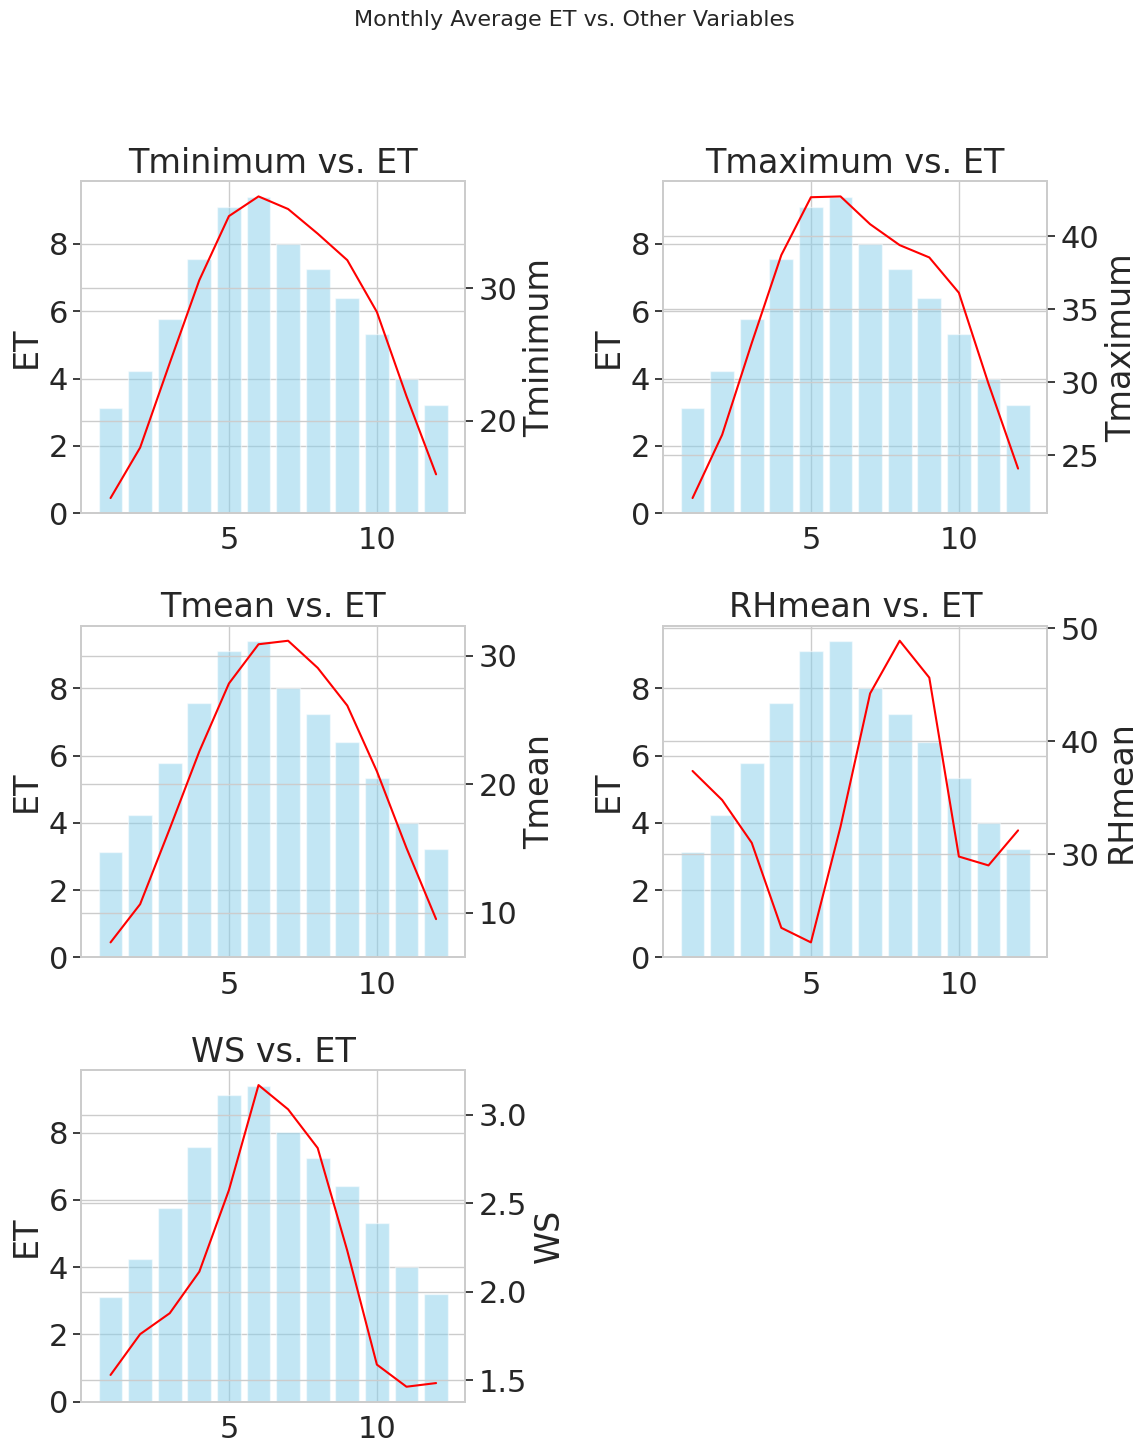

In [ ]:
import matplotlib.pyplot as plt

# Calculate monthly averages
monthly_avg = df.groupby('Month').mean()

# Create subplots in a grid with 2 columns
fig, axs = plt.subplots(3, 2, figsize=(12, 15))
fig.suptitle('Monthly Average ET vs. Other Variables', fontsize=16)

# Variables to plot
variables = ['Tminimum', 'Tmaximum', 'Tmean', 'RHmean', 'WS']
line_color = 'red'

for i, variable in enumerate(variables):
    row, col = divmod(i, 2)
    ax = axs[row, col]

    ax.bar(monthly_avg.index, monthly_avg['ET'], color='skyblue', alpha=0.5, label='ET')
    ax.set_ylabel('ET')

    # Create a twin Y-axis for the other variable
    ax2 = ax.twinx()
    ax2.plot(monthly_avg.index, monthly_avg[variable], label=variable, color=line_color)
    ax2.set_ylabel(variable)

    ax.set_title(f'{variable} vs. ET')

# Remove empty subplots if there are any
if len(variables) < 6:
    for i in range(len(variables), 6):
        fig.delaxes(axs.flatten()[i])

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the plot with 400 DPI
plt.savefig('/content/plot.png', dpi=400)

# Provide a link to download the saved plot
from google.colab import files
files.download('/content/plot.png')




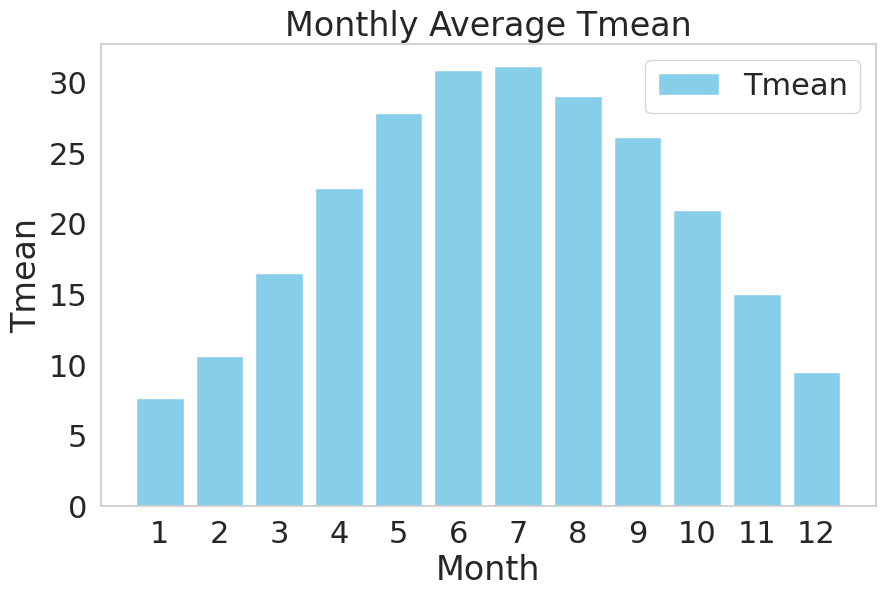

In [ ]:
import matplotlib.pyplot as plt

# Calculate monthly averages
monthly_avg = df.groupby('Month').mean()

# Create a bar plot for Tmean
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg.index, monthly_avg['Tmean'], label='Tmean', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Tmean')
plt.title('Monthly Average Tmean')
plt.xticks(monthly_avg.index)
plt.legend()
plt.grid()
plt.show()



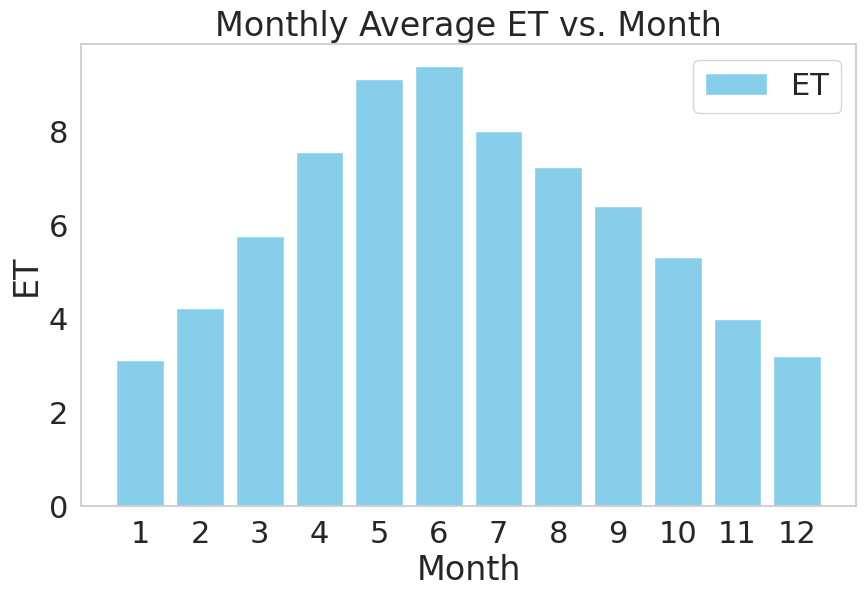

In [ ]:
import matplotlib.pyplot as plt

# Calculate monthly averages
monthly_avg = df.groupby('Month').mean()

# Create a bar plot with Tmean on X-axis and ET on Y-axis
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg.index, monthly_avg['ET'], label='ET', color='skyblue')
plt.xlabel('Month')
plt.ylabel('ET')
plt.title('Monthly Average ET vs. Month')
plt.xticks(range(1, 13))  # Set X-axis ticks from 1 to 12
plt.legend()
plt.grid()
plt.show()



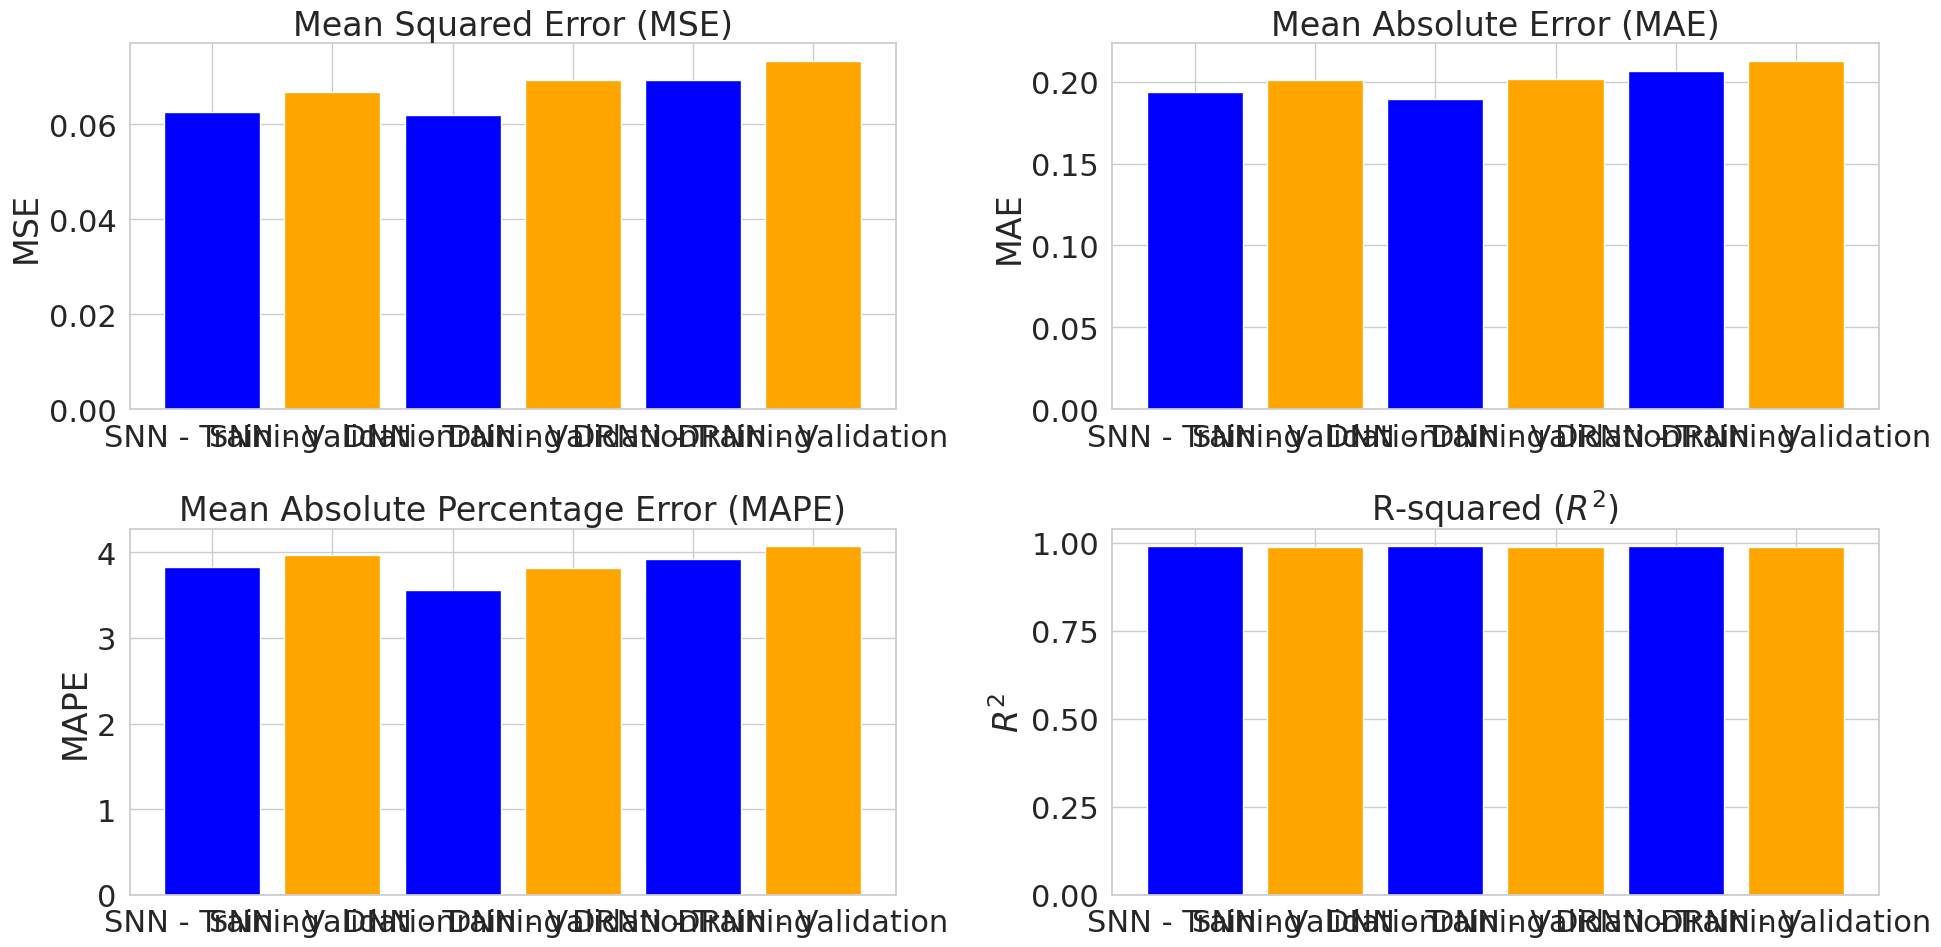

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['SNN - Training', 'SNN - Validation', 'DNN - Training', 'DNN - Validation', 'DRNN - Training', 'DRNN - Validation']
mse = [0.0626, 0.0667, 0.0620, 0.0692, 0.0692, 0.0733]
mae = [0.1937, 0.2009, 0.1892, 0.2015, 0.2065, 0.2127]
mape = [3.8254, 3.9720, 3.5570, 3.8160, 3.9211, 4.0728]
r2 = [0.99, 0.9879, 0.99, 0.9876, 0.99, 0.9867]

# Plotting
plt.figure(figsize=(20, 10))

# Mean Squared Error (MSE) comparison
plt.subplot(2, 2, 1)
plt.bar(models, mse, color=['blue', 'orange', 'blue', 'orange', 'blue', 'orange'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

# Mean Absolute Error (MAE) comparison
plt.subplot(2, 2, 2)
plt.bar(models, mae, color=['blue', 'orange', 'blue', 'orange', 'blue', 'orange'])
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

# Mean Absolute Percentage Error (MAPE) comparison
plt.subplot(2, 2, 3)
plt.bar(models, mape, color=['blue', 'orange', 'blue', 'orange', 'blue', 'orange'])
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.ylabel('MAPE')

# R-squared comparison
plt.subplot(2, 2, 4)
plt.bar(models, r2, color=['blue', 'orange', 'blue', 'orange', 'blue', 'orange'])
plt.title('R-squared ($R^2$)')
plt.ylabel('$R^2$')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


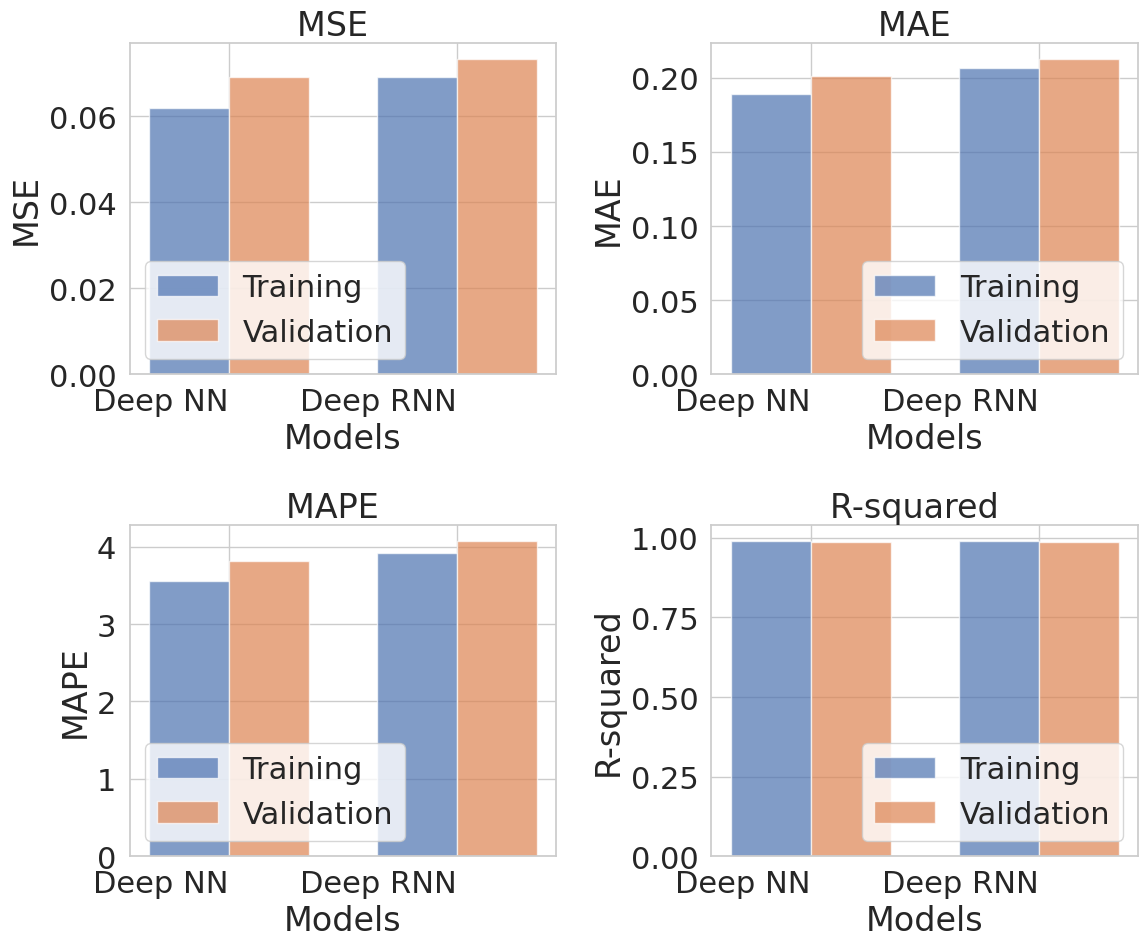

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['Deep NN', 'Deep RNN']
metrics = ['MSE', 'MAE', 'MAPE', 'R-squared']
train_results = np.array([
    [0.0620, 0.1892, 3.5570, .99],
    [0.0692, 0.2065, 3.9211, 0.99]
])
val_results = np.array([
    [0.0692, 0.2015, 3.8160, 0.9876],
    [0.0733, 0.2127, 4.0728, 0.9867]
])

# Plotting for each metric arranged in a grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2

    # Set bar positions
    train_positions = np.arange(len(models))
    val_positions = train_positions + 0.35

    # Plot training bars
    axs[row, col].bar(train_positions, train_results[:, i], 0.35, label='Training', alpha=0.7)

    # Plot validation bars
    axs[row, col].bar(val_positions, val_results[:, i], 0.35, label='Validation', alpha=0.7)

    # Set x-axis labels and tick positions with rotation
    axs[row, col].set_xticks(train_positions + 0.35 / 2)
    axs[row, col].set_xticklabels(models, ha='right')
    axs[row, col].set_xlabel('Models')

    # Set y-axis label
    axs[row, col].set_ylabel(metric)

    # Add legend with adjusted position
    if i % 2 == 0:  # Place legend on the upper left for even indices
        axs[row, col].legend(loc='lower left')
    else:  # Place legend on the upper right for odd indices
        axs[row, col].legend(loc='lower right')

    # Set title for the subplot
    axs[row, col].set_title(f'{metric}  ')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

